In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# All the main settings are in this cell.



FILE="20250206_Jurkat_vav1_all_YDS" # This should be your FILENAME.pg_matrix.tsv. No extension needed.
GROUP_NAME = ["DMSO", 
              "NGT-201-17_8nM",  "NGT-201-17_40nM",  "NGT-201-17_200nM",  "NGT-201-17_1000nM",
              "NGT-201-110_8nM", "NGT-201-110_40nM", "NGT-201-110_200nM", "NGT-201-110_1000nM",
              "NGT-201-111_8nM", "NGT-201-111_40nM", "NGT-201-111_200nM", "NGT-201-111_1000nM",
              "NGT-201-117_8nM", "NGT-201-117_40nM", "NGT-201-117_200nM", "NGT-201-117_1000nM",
              "NGT-201-18_8nM",  "NGT-201-18_40nM",  "NGT-201-18_200nM",  "NGT-201-18_1000nM",
              "NGT-201-123_8nM", "NGT-201-123_40nM", "NGT-201-123_200nM", "NGT-201-123_1000nM",
              "NGT-201-132_8nM", "NGT-201-132_40nM", "NGT-201-132_200nM", "NGT-201-132_1000nM",
              "NGT-201-135_8nM", "NGT-201-135_40nM", "NGT-201-135_200nM", "NGT-201-135_1000nM",
              "NGT-201-138_8nM", "NGT-201-138_40nM", "NGT-201-138_200nM", "NGT-201-138_1000nM",
              "NGT-201-141_8nM", "NGT-201-141_40nM", "NGT-201-141_200nM", "NGT-201-141_1000nM",
              "NGT-201-144_8nM", "NGT-201-144_40nM", "NGT-201-144_200nM", "NGT-201-144_1000nM",
              "NGT-201-146_8nM", "NGT-201-146_40nM", "NGT-201-146_200nM", "NGT-201-146_1000nM",
              "NGT-201-147_8nM", "NGT-201-147_40nM", "NGT-201-147_200nM", "NGT-201-147_1000nM",
              "NGT-201-148_8nM", "NGT-201-148_40nM", "NGT-201-148_200nM", "NGT-201-148_1000nM",
              ]

reference_group = "DMSO" # Setting reference group here. Reference group should have the least missing value, a.k.a. more complex proteome. For TPD, this should be DMSO, while for AP-MS, this should be treatment group
comparison_matrix = [] # empty list means all other groups are compared with the reference group
# An example if you want to customize comparison groups:
"""
comparison_matrix = [
    ['NGT20-12_1uM', 'DMSO'],
] # treatment_group : reference_group
"""
imputation_option=False # Enable imputation on both treatment group and reference group. Reference group needs to have >50% non-missing values. See readme.md for details.
PharosTCRD=False # Color the proteome according to the pharmacogenomics classification Tclin/Tchem/Tbio/Tdark, will cover any other colors. Read: http://juniper.health.unm.edu/tcrd/
limma_option=True # Enable R-limma model for statistics calculation. You need to install R, set environment variable R_HOME, and install limma library in R. Disable means student T test with BH adjustment





In [ ]:
# Contaminants and PharosTCRD Datasets
#remove proteins from contaminant database
#contaminants=["ALBU_HUMAN", "AMY1A_HUMAN", "AMY1B_HUMAN", "AMY1C_HUMAN", "ANT3_HUMAN", "ANXA5_HUMAN", "B2MG_HUMAN", "BID_HUMAN", "CAH1_HUMAN", "CAH2_HUMAN", "CATA_HUMAN", "CATD_HUMAN", "CATG_HUMAN", "CO5_HUMAN", "CRP_HUMAN", "CYB5_HUMAN", "CYC_HUMAN", "EGF_HUMAN", "FABPH_HUMAN", "GELS_HUMAN", "GSTA1_HUMAN", "GSTP1_HUMAN", "HBA_HUMAN", "HBB_HUMAN", "HBEGF_HUMAN", "IGF2_HUMAN", "IL8_HUMAN", "INHBA_HUMAN", "INHBB_HUMAN", "KCRM_HUMAN", "LALBA_HUMAN", "LEP_HUMAN", "LYSC_HUMAN", "MYG_HUMAN", "NEDD8_HUMAN", "NQO1_HUMAN", "NQO2_HUMAN", "PDGFB_HUMAN", "PPIA_HUMAN", "PRDX1_HUMAN", "RASH_HUMAN", "RET4_HUMAN", "RS27A_HUMAN", "SODC_HUMAN", "SUMO1_HUMAN", "HARS1_HUMAN", "TAU_HUMAN", "THIO_HUMAN", "TNFA_HUMAN", "TRFE_HUMAN", "TRFL_HUMAN", "UB2E1_HUMAN", "UBE2C_HUMAN", "K1C26_HUMAN", "K2C3_HUMAN", "K1C15_HUMAN", "K2C79_HUMAN", "K2C6B_HUMAN", "K1C17_HUMAN", "K2C4_HUMAN", "K2C73_HUMAN", "K2C71_HUMAN", "K2C7_HUMAN", "K2C8_HUMAN", "K1C39_HUMAN", "K1C18_HUMAN", "K1C28_HUMAN", "K1C16_HUMAN", "K2C1_HUMAN", "K2C5_HUMAN", "K2C80_HUMAN", "K2C1B_HUMAN", "K2C75_HUMAN", "K2C6A_HUMAN", "K2C72_HUMAN", "K1C24_HUMAN", "K1C19_HUMAN", "K2C74_HUMAN", "K1C27_HUMAN", "K1C20_HUMAN", "K1C9_HUMAN", "K1C23_HUMAN", "K1C12_HUMAN", "K1C14_HUMAN", "K2C6C_HUMAN", "K1C10_HUMAN", "K1C13_HUMAN", "K22O_HUMAN", "K1C25_HUMAN", "K2C78_HUMAN", "K22E_HUMAN", "K1C40_HUMAN", "KRT85_HUMAN", "KRT38_HUMAN", "KRT34_HUMAN", "KRT86_HUMAN", "KRT35_HUMAN", "KT33B_HUMAN", "KRT81_HUMAN", "KRT37_HUMAN", "KT33A_HUMAN", "KRT83_HUMAN", "K1H1_HUMAN", "KRT82_HUMAN", "K1H2_HUMAN", "KRT36_HUMAN", "KRT84_HUMAN"]
contaminants=["P02768", "P0DUB6", "P0DTE7", "P0DTE8", "P01008", "P08758", "P61769", "P55957", "P00915", "P00918", "P04040", "P07339", "P08311", "P01031", "P02741", "P00167", "P99999", "P01133", "P05413", "P06396", "P08263", "P09211", "P69905", "P68871", "Q99075", "P01344", "P10145", "P08476", "P09529", "P06732", "P00709", "P41159", "P61626", "P02144", "Q15843", "P15559", "P16083", "P01127", "P62937", "Q06830", "P01112", "P02753", "P62979", "P00441", "P63165", "P12081", "P10636", "P10599", "P01375", "P02787", "P02788", "P51965", "O00762", "Q7Z3Y9", "P12035", "P19012", "Q5XKE5", "P04259", "Q04695", "P19013", "Q86Y46", "Q3SY84", "P08729", "P05787", "Q6A163", "P05783", "Q7Z3Y7", "P08779", "P04264", "P13647", "Q6KB66", "Q7Z794", "O95678", "P02538", "Q14CN4", "Q2M2I5", "P08727", "Q7RTS7", "Q7Z3Y8", "P35900", "P35527", "Q9C075", "Q99456", "P02533", "P48668", "P13645", "P13646", "Q01546", "Q7Z3Z0", "Q8N1N4", "P35908", "Q6A162", "P78386", "O76015", "O76011", "O43790", "Q92764", "Q14525", "Q14533", "O76014", "O76009", "P78385", "Q15323", "Q9NSB4", "Q14532", "O76013", "Q9NSB2"]


# g_loop containing protein list from https://github.com/monterosatx/gloop-mining/tree/f60b3a785a10980be4a6f6bec13c5f43f013ef7e/notebooks/preprocessed_files
g_loop_5res_noEC=["P48729", "Q9UKT9", "Q8NCP5", "P51508", "Q3ZCT1", "P52746", "Q8N587", "Q96SL8", "Q96I27", "Q96JP5", "Q8WXB4", "A8MQ14", "Q66K89", "Q9P2Y4", "Q8WTR7", "Q6AW86", "Q9GZX5", "Q96JB3", "Q96JL9", "Q8N972", "Q8NCN2", "Q8N752", "Q9H4Q3", "Q7L945", "Q96AP4", "Q8TBZ8", "P17040", "Q9H7R0", "Q8TF39", "Q7Z398", "Q9Y2G7", "Q96MU6", "Q96EG3", "Q16600", "O95785", "O75362", "Q96MR9", "Q96SR6", "Q9UL59", "Q9GZU2", "Q96DR7", "O00110", "Q9Y2L8", "O95125", "Q9H582", "Q96NL3", "Q15697", "Q6ZN55", "Q9P243", "Q68DY9", "Q8N393", "P28698", "Q96MX3", "Q3SY52", "Q9UPV0", "Q6ZSB9", "P17025", "P17098", "Q5EBL2", "A6NFI3", "Q9BS31", "Q6ZNA1", "E7ETH6", "P17029", "Q3KP31", "Q9UJQ4", "Q6ZNH5", "Q5HYK9", "Q6P3V2", "Q9NZV7", "P49910", "Q8NHY6", "Q9BWM5", "Q96IT1", "Q8N554", "Q13422", "Q5T5D7", "Q9NSD4", "P15622", "P52740", "Q9BY31", "Q5T1R4", "Q13105", "P49711", "Q9Y2P0", "P17017", "Q2M3X9", "P10074", "Q96PQ6", "Q86T24", "Q5T7W0", "Q8NC26", "Q05516", "Q9C0K0", "Q9UL58", "Q6P280", "Q9BS34", "B2RXF5", "Q9BYN7", "Q9NYW8", "Q9BXA9", "Q8N8Y5", "Q8IX07", "O43361", "Q13398", "O15015", "Q13127", "P10073", "Q8N988", "Q17R98", "Q9NQX6", "Q9C0G0", "P08631", "Q96PE6", "Q9P0T4", "Q13360", "Q15935", "Q9UGP4", "Q92618", "Q8IZC7", "Q14526", "Q86UP3", "Q8N8L2", "Q8N7M2", "Q8TAW3", "Q14587", "Q3ZCX4", "Q6IQ21", "Q9NWS9", "Q96C28", "Q8TC21", "Q9C0F3", "Q14894", "Q96NG5", "O95365", "Q6V9R5", "Q9HCE3", "P51522", "P0CJ78", "P17041", "Q9BRR0", "Q8TF50", "P17039", "Q96CX3", "O75820", "Q96BV0", "Q8N0Y2", "A6NDX5", "Q8N1G0", "Q6ZN57", "Q9H2S9", "C9JN71", "Q15973", "Q9NXT0", "Q8N8J6", "P17020", "O15535", "Q96CS4", "Q9BUY5", "P0CG24", "Q08AG5", "Q9Y6R6", "Q6ZMS4", "Q9Y6Q3", "P17028", "Q96SZ4", "Q52M93", "Q9Y2D9", "Q9UK33", "Q32M78", "Q96SK3", "Q6P9A3", "P35789", "P52738", "Q8NAF0", "Q9Y2K1", "Q96BR6", "Q9UEG4", "P15621", "O75290", "B7Z6K7", "Q96K58", "Q03112", "Q86UD4", "Q5VV41", "Q3KQV3", "Q8IVC4", "Q96K83", "Q15072", "Q96JF6", "Q9BWE0", "Q6ZMV8", "Q2M3W8", "Q9UFB7", "Q9UID6", "Q9HBE1", "P16415", "Q8NEP9", "Q9UJN7", "Q8NB50", "Q9BR84", "Q96K75", "Q68DI1", "Q8N2I2", "Q8N8Z8", "Q9UC06", "Q8IZ26", "Q6NSZ9", "Q92610", "Q14592", "Q9NQV7", "Q8TAU3", "Q96RE9", "Q9UC07", "Q03923", "Q9HCZ1", "Q9NYT6", "Q9H609", "Q8NDP4", "Q9ULM2", "P17010", "Q9Y2A4", "Q9NTW7", "Q8WXR4", "Q96SQ5", "Q86W11", "Q6P9A1", "B1APH4", "Q6AZW8", "Q2M218", "P17030", "Q99684", "Q8NDQ6", "Q70EL2", "Q9UHF7", "P51786", "P58317", "Q9HAZ2", "Q7Z7L9", "Q96GE5", "Q86YE8", "Q6ZS27", "Q9UK11", "A6NGD5", "Q9NW07", "Q13106", "Q9H7X3", "Q6PDB4", "Q8NB42", "Q08ER8", "A6NM28", "Q9BRH9", "Q8TBC5", "Q6P2D0", "Q9UNY5", "Q6NX49", "Q5TC79", "Q6ZN08", "Q14584", "O14709", "O60304", "Q969J2", "Q8N184", "Q8IYI8", "Q9Y467", "Q8N859", "Q96RU8", "Q9HAH1", "Q9Y462", "Q8TF45", "Q6DD87", "Q96SE7", "Q9BSG1", "P17027", "P51814", "Q8N7K0", "A0PJY2", "Q9H0M5", "Q9BRP0", "Q8N9K5", "P17021", "Q9NR11", "Q7Z569", "A8MT65", "P17024", "Q8N720", "O75123", "O95863", "Q6ECI4", "P51523", "Q5T0B9", "B4DXR9", "O96013", "P17032", "Q7Z3V5", "P11161", "Q9P2D1", "Q96KM6", "Q86T82", "P25490", "Q5SVQ8", "Q9H5H4", "Q96CK0", "P52741", "Q6ZTB9", "P52737", "Q9Y5A6", "Q6ZN19", "P45974", "Q8IZ20", "Q15937", "Q6ZMY9", "Q16595", "Q8NDW4", "Q6PG37", "Q5JNZ3", "Q9NVP4", "Q96MM3", "Q8N4W9", "P0C7X5", "Q9H5J0", "P10075", "Q147U1", "P13682", "Q4V348", "Q14585", "Q86XF7", "Q8NF99", "P17097", "Q0D2J5", "Q9UL36", "P56270", "Q9UJW8", "Q9ULJ3", "Q8TA94", "Q9BU19", "O95625", "Q8N883", "Q76KX8", "Q8TF20", "Q6PF04", "Q3KNS6", "Q5JVG2", "P17036", "Q9BWW7", "P0CJ79", "Q86VV4", "Q68EA5", "Q92766", "Q86V86", "Q52WX2", "Q9UDV7", "Q6ZSS3", "P17014", "Q5MCW4", "Q96ND8", "Q8N141", "Q16670", "P57071", "Q9HCG1", "Q6ZMW2", "Q9P0L1", "Q5VTD9", "Q9HCL3", "Q12774", "O14753", "O75467", "Q8N143", "B4DU55", "Q96NI8", "Q9H707", "Q9H9D4", "Q9Y473", "Q5TYW1", "Q3MIS6", "Q5VV52", "Q76L83", "Q6PK81", "Q9Y2P7", "Q92995", "P51504", "Q06732", "Q8IVP9", "Q96HQ0", "Q494X3", "Q96ME7", "Q9UJL9", "Q7Z7K2", "Q9NQZ8", "Q8NCK3", "Q9UDV6", "Q86TJ5", "B7ZLF3", "P15822", "Q9HBJ7", "P52742", "Q8N8C0", "Q96NJ6", "Q96H86", "Q3MJ62", "Q96GC6", "P17031", "Q9NPC7", "Q49AA0", "Q9NQV6", "Q7Z340", "O43829", "Q9H4Z2", "Q969W8", "Q9UIE0", "Q8NEK5", "O43309", "P59923", "Q6ZN11", "Q9BSK1", "Q9NYY3", "Q8TAQ5", "O95201", "Q2TB10", "Q3SXZ3", "O00410", "Q499Z4", "Q8IW93", "Q5CZA5", "P17023", "Q86T29", "Q8TF47", "Q96NG8", "Q8TAF7", "O43167", "Q06730", "Q8NA42", "Q6ZNG0", "Q86UE3", "Q5T619", "Q96T92", "O43296", "Q9Y5T5", "Q8N9F8", "Q96LW9", "Q13332", "O15090", "Q6BEB4", "Q9UK10", "O14978", "Q8N9Z0", "Q8N680", "Q9UKS7", "Q9Y3M9", "Q6ZN79", "Q96LW1", "P0C024", "Q9HBT8", "Q96N22", "Q96N58", "Q7Z6J0", "Q9H1R3", "Q53GI3", "Q12901", "Q86UQ0", "Q6NX45", "Q9UPG8", "Q8WV37", "P10072", "A8MTY0", "P51955", "Q03938", "Q06889", "Q9BXR0", "Q8NEV4", "Q5FWF6", "Q9H116", "P0CI00", "P23468", "Q9NQX0", "Q8IYB9", "Q9HCX3", "Q6NUN9", "Q7Z3I7", "Q8TBJ5", "P24941", "Q96DT7", "Q8TDX7", "P0CG31", "Q96JM3", "O60765", "Q9BX82", "Q9H4T2", "Q96N77", "Q4G0J3", "P98182", "A8MWA4", "Q96JG9", "Q8N3J9", "Q03924", "Q9NZL3", "Q96BR9", "Q9BUG6", "O14771", "Q9P2J8", "Q9NU63", "Q8IXT1", "Q2M1K9", "Q5TEC3", "Q96K62", "Q96H40", "Q86V71", "P52743", "O43181", "Q6IV72", "O14628", "Q8IYX0", "Q8IXJ9", "Q14593", "P24278", "Q8NI51", "Q9BWX5", "Q2VY69", "A6NIX2", "P37275", "Q6AHZ1", "Q92626", "Q15940", "Q8IWY8", "Q8WW38", "Q15776", "Q8N2R0", "P0CH99", "O95780", "A6NK53", "Q8NCA9", "Q16587", "Q9NQX1", "O43623", "Q99676", "Q8WUU4", "Q14588", "Q9Y2H8", "Q8TEJ3", "Q9UJW7", "P52736", "O94892", "A6NP11", "Q9P1Z0", "O15391", "Q9HBT7", "Q96IR2", "O75132", "Q7L3S4", "Q5T5X7", "Q86WZ6", "P0C7X2", "P06239", "A6NN14", "Q63HK3", "Q96JC4", "P52747", "Q6ZR52", "Q08AN1", "Q86Y25", "Q9Y485", "Q99592", "Q9UII5", "P17038", "Q05481", "Q9NQ03", "Q9NSC2", "P12931", "Q5SXM1", "O75716", "Q9NUA8", "Q96IU2", "Q5W0Q7", "Q6P9G9", "Q9H8G1", "A6NHJ4", "Q14119", "Q8TBZ5", "O43451", "Q14929", "Q68DY1", "P18146", "Q14590", "P0DPD5", "Q8IYN0", "A8MVS1", "Q9HCC0", "Q9UJU3", "Q8TD17", "B4DX44", "Q8N7Q3", "Q8TCN5", "O75808", "Q96A37", "P17022", "Q9Y2Q1", "A8MXY4", "O60522", "Q6P1L6", "Q13153", "Q8TF32", "Q9H165", "Q86YV6", "Q9H0M0", "Q9NSJ1", "Q5JVG8", "P0CG23", "Q0VGE8", "Q96N20", "Q9ULD5", "Q86UZ6", "Q96LX8", "P08048", "Q96Q40", "Q15928", "O75437", "Q86XU0", "Q49A33", "Q9H7R5", "O75373", "Q5JPB2", "Q16630", "Q8NBB4", "P41182", "Q9UEE5", "Q15916", "Q3KNW1", "Q9NZJ4", "Q9H963", "A2RRD8", "Q9H0D2", "P54317", "Q96C00", "Q8N9V3", "Q8TAX0", "Q8N895", "O43293", "O15060", "A8K8V0", "Q6ZN30", "A8MUZ8", "P17035", "Q9UK13", "Q5EBM4", "Q07157", "Q8IU85", "Q03936", "Q92772", "O75346", "Q8N8W4", "Q92670", "Q15772", "Q96N95", "Q9Y2K6", "O60315", "P50053", "Q8IY92", "Q9Y330", "O76071", "Q9Y680", "A0A1W2PQL4", "Q13432", "Q96N38", "Q02386", "Q6U7Q0", "P35749", "Q14586", "Q6ZT77", "P0DKX0", "Q9UDY2", "P36508", "Q9NX65", "Q8N782", "Q6ZN06", "Q86XD8", "P17026", "Q9BVG8", "Q5VIY5", "Q86XN6", "A6NK75", "Q9Y6R4", "A6NNF4", "Q96C55", "O43900", "Q4L235", "P17019", "Q8N567", "Q9Y4E5", "Q8NAP3", "O94921", "P53778", "Q5HY98", "Q8N446", "Q8NAP8", "Q9HCK0", "A8MUV8", "Q9NV72", "Q8NEM1", "Q9UQR1", "Q6ZNG1", "P10586", "P0DMV8", "Q9NRE2", "P35579", "Q9Y6E7", "P51815", "Q9Y2Y4", "Q8TEW8", "Q7RTY8", "P11717", "Q13029", "Q5THJ4", "Q9NZV6", "Q86VK4", "Q9P255", "Q96G25", "Q9UM63", "O00444", "O95639", "Q8TB69", "Q96JM2", "P22307", "Q8IW36", "P52744", "Q92784", "A1KZ92", "Q9P1U0", "P49841", "Q96NJ3", "C9JLR9", "Q8N823", "Q9NST1", "Q6ZSZ6", "O75541", "Q6DJT9", "Q8TAD4", "Q9H9Z2", "Q5T1V6", "Q07912", "Q8IZ52", "Q8N1W2", "Q9GZV8", "O43257", "Q09FC8", "Q15637", "O75914", "P53355", "Q15911", "Q3L8U1", "Q6NZY4", "Q92900", "O94880", "Q05215", "Q9BUL5", "Q9UQ07", "P0CB33", "Q96L73", "Q9NUL5", "O75460", "Q92908", "Q8N684", "Q9P286", "Q8WZA1", "Q8NEW0", "Q7L2R6", "Q5VST9", "Q96KG9", "Q9UM73", "Q9UBE8", "Q13216", "P17706", "Q9P2F9", "O60232", "Q15149", "Q7Z6Z7", "Q00532", "Q92785", "Q86UW9", "Q96PN7", "P31040", "Q3MJ13", "Q9BXT2", "P23193", "P15170", "O15197", "Q15650", "P31629", "Q63HK5", "Q9H0A9", "Q9HBY8", "P26368", "Q9UBC2", "O94804", "Q9UBS8", "Q8N594", "Q9UPN3", "O15156", "Q9P0J7", "P20645", "Q8TDJ6", "Q93052", "Q96PY6", "Q99973", "Q9BTP6", "Q05BV3", "Q8N8U3", "Q13526", "P26045", "Q92918", "P0CG47", "P53816", "Q13164", "Q9NWM8", "Q14CX7", "Q9NQU5", "Q99698", "Q13438", "Q15717", "Q8IYY4", "Q9P2E5", "Q9NRA1", "O43298", "Q9UKE5", "O95819", "Q32MK0", "Q9C0B9", "Q96LA8", "Q6P5Z2", "Q00403", "Q9NYV4", "Q2WGJ9", "Q9BX70", "Q9BQ04", "Q9C0A1", "Q13043", "O75164", "Q8WW36", "O14976", "Q7Z7A3", "Q9UBI9", "Q16512", "Q17RR3", "P06241", "Q9H4B4", "Q9NUD5", "Q9NZQ3", "A3KN83", "P51784", "Q8WYB5", "Q9Y3D5", "P05981", "Q8N766", "P0DPI3", "P51531", "Q86X55", "Q5VYS8", "Q01101", "Q96BR1", "P62633", "Q8WUJ3", "O43482", "O75191", "Q9NWF9", "Q9UIK4", "Q96DY7", "P31749", "Q16637", "Q5VUE5", "P19021", "Q70EL1", "P53634", "O95786", "P20929", "O94768", "Q13554", "Q96CV9", "Q09472", "P14410", "O00299", "P10253", "P49748", "Q9NP64", "O14733", "P98161", "Q03001", "O43924", "Q9UBW7", "Q9BWT6", "O60384", "Q01844", "Q9C0D4", "Q3ZCN5", "P08670", "Q92794", "O60928", "O76031", "P78382", "P24723", "O75554", "A0A0U1RRI6", "Q92782", "Q6IN85", "Q6ZRF7", "Q9BSC4", "Q8WV22", "Q7Z2Y5", "Q8NEZ4", "Q5VZL5", "Q13257", "A0A0U1RR11", "P07814", "Q7RTN6", "Q8N3P4", "P25791", "O14936", "P15976", "Q9NZE8", "P01031", "Q13155", "P17612", "P51532", "Q96SD1", "O95602", "Q9BX63", "Q86UV5", "Q16236", "Q9BZ95", "P19526", "Q8N8R7", "O75312", "O75976", "Q9Y2E6", "Q5VTE6", "Q8N5M9", "Q92804", "P48730", "P26718", "Q14534", "O14802", "O15072", "Q8IVV2", "O14920", "O96028", "P52701", "Q8N4C8", "O60828", "P52943", "O75940", "P49674", "Q969R5", "Q9NRC8", "Q8IV63", "P62191", "O95450", "O15264", "P51948", "Q13084", "Q2TBC4", "Q5TAX3", "Q9Y2G2", "Q5TDH0", "Q6H8Q1", "Q8TD08", "Q8WYQ9", "O75096", "P11831", "Q9NR21", "P27144", "P05164", "Q86X67", "P54646", "A0A1W2PR19", "P55010", "Q14498", "Q92817", "P25098", "P35637", "Q9BRR9", "P15735", "P23921", "Q9BZL6", "P23771", "Q6ZN17", "Q9UHD2", "P53671", "P43694", "Q9Y4E8", "Q9HCK8", "Q9P2K8", "P31751", "Q9UK80", "Q9NR12", "Q8TDR2", "P18887", "Q13454", "P42566", "P07711", "Q14004", "Q9UIJ7", "Q15942", "Q13233", "Q8TD26", "Q13352", "O14686", "O60547", "Q92520", "Q53GS9", "P49023", "P35498", "Q13148", "Q96L34", "Q9UI30", "P05067", "D6R901", "O00468", "O75534", "P09651", "Q3SY17", "P50238", "Q4JDL3", "Q9BUB5", "P34896", "Q14145", "O00213", "Q9BWF3", "O15428", "Q6ZUM4", "Q16342", "Q6B0I6", "Q6DKJ4", "Q8NCN5", "Q9BQS8", "Q9H7E2", "Q96BQ1", "O95299", "Q8WXD9", "P57058", "Q7Z4I7", "Q8NDX5", "Q96D46", "Q6PI98", "Q6PI78", "P06493", "Q8IWL3", "O43252", "Q14847", "Q15654", "Q9H1U9", "P07948", "Q9UK39", "Q96BT7", "Q0VDD8", "Q8N568", "Q96T23", "Q96EN8", "O76074", "Q0WX57", "Q9C086", "O75771", "Q92870", "P42345", "Q09013", "Q96JY6", "Q16644", "Q9H0A0", "Q13188", "Q01201", "O60645", "Q8TBE0", "Q9Y2H1", "Q9NPJ3", "O43294", "P57075", "Q9BYT8", "P08621", "P21796", "D6RIA3", "P12104", "Q9BZ19", "P78364", "Q9NY46", "P09769", "P53667", "P30566", "B2RXH2", "Q9UJA3", "Q9NR71", "Q5VTJ3", "P34947", "O75197", "Q8IY67", "Q8TF17", "P43304", "Q15306", "Q16825", "P52756", "O75676", "Q92806", "P48059", "Q9Y243", "Q96T88", "Q05BQ5", "Q15858", "Q5VU65", "P34897", "A6NKG5", "Q16527", "Q6ZMW3", "A8MUK1", "Q86TG7", "Q5TBB1", "Q96NX5", "O95704", "Q08397", "Q9C0H5", "Q96JK4", "P43250", "Q9HC10", "P53803", "Q9H2X0", "Q13557", "P50461", "P54819", "P12956", "Q9Y2K7", "Q15835", "Q13239", "Q99594", "Q9HCE7", "A9Z1Z3", "Q96RU7", "O75581", "Q9H9L4", "P0C263", "O60674", "Q96M53", "Q86Y01", "Q9HCJ3", "Q16629", "O15162", "O60437", "Q9NWD8", "Q9UGL1", "Q6ZUV0", "Q01085", "P28347", "Q8WUA2", "Q9UL41", "P41250", "Q9NXA8", "P35626", "Q5VT66", "P20794", "Q96FB5", "Q9Y388", "P35228", "Q8IUH3", "Q8N653", "Q9UBN7", "O00203", "O95817", "Q9NRS4", "Q5H8C1", "Q9BQA5", "Q99729", "P32298", "Q9NZJ5", "P38567", "P60900", "P21291", "Q99558", "P19338", "P50479", "Q9NYC9", "P20585", "P02790", "Q9UJU6", "Q86TW2", "P48544", "Q8N302", "P11142", "P98082", "Q5T890", "Q8IVH8", "Q9UPZ9", "Q9H1H9", "O75964", "Q7KZI7", "P58107", "Q15842", "Q9P0L2", "Q9NX07", "Q96J87", "Q14669", "Q15477", "Q9UPT9", "P50750", "Q15208", "P19440", "P20155", "P22626", "P23769", "Q9H9Y6", "Q5XKP0", "Q14103", "O00154", "Q86U06", "P48549", "Q14654", "Q9H6Y2", "P48051", "P54652", "Q9Y5Q5", "P51991", "Q9BTD8", "Q9H0J9", "P30291", "P15924", "Q8NFF5", "Q8WTQ7", "E7EW31", "Q9H0Z9", "P83881", "O15068", "Q68DX3", "O75781", "Q13177", "Q5T9C2", "Q9BZC1", "P23471", "P23469", "Q9Y4K4", "Q86XR7", "P21580", "Q9Y616", "O94929", "Q9NS91", "Q9C0K7", "Q8WYK0", "Q96EP1", "P33240", "P07947", "A0A2R8Y4L2", "Q9ULA0", "P49366", "P27448", "Q8NCB2", "P29375", "Q8N3X1", "P31483", "A6NIH7", "P55072", "P51451", "P54136", "Q9HAU4", "Q9HAC7", "Q7Z3J3", "Q8NCW0", "Q9UHN1", "Q5SZQ8", "Q7Z4S9", "A0A1W2PPD8", "Q8TF42", "Q5VST6", "Q8TC59", "Q969Y2", "O60870", "Q8TBF4", "Q13151", "P38435", "Q9BX46", "P22735", "Q00526", "Q02750", "Q96S53", "Q8N6M0", "P25205", "Q9Y483", "Q9Y285", "P15260", "Q9H0U3", "O75503", "O15417", "Q32P51", "Q9NRF8", "P98175", "P51805", "O75106", "Q8WVZ9", "Q9NRC1", "P0C7L1", "Q9UHX1", "Q96IF1", "Q5T4B2", "Q8IXJ6", "Q9UL63", "Q99250", "Q8IXK0", "Q9HAW0", "P38646", "Q9NRH2", "Q96J02", "P22612", "O75051", "Q15569", "P45985", "Q86V97", "P58499", "Q8TE82", "Q9H900", "Q9NPI9", "Q9H9P5", "Q14576", "O75553", "Q9UGJ0", "Q92519", "Q9HA77", "Q96IC2", "Q15427", "Q16186", "Q5T8I3", "Q9HDB8", "P04439", "Q9BUN8", "Q86UW6", "Q9HD43", "Q9UID3", "P11021", "P02766", "P34931", "Q8IY37", "Q9P2P5", "Q8NHM5", "P22732", "O14979", "O43896", "P26378", "Q6ZS30", "P0DJD0", "P63220", "Q02548", "Q9BUY7", "Q9NQT8", "Q13630", "Q96JC9", "Q7Z406", "Q12899", "Q08431", "Q08945", "Q6ZUT9", "Q14562", "O43918", "O14967", "Q9UNX4", "Q5MAI5", "Q9UKH3", "Q9UJP4", "P17213", "O60711", "Q92729", "Q9BYG3", "P62269", "Q92620", "Q12926", "Q8WXE0", "P18433", "P0DJD1", "P52888", "Q16853", "Q9UQM7", "Q9Y676", "P11166", "Q6ZST2", "Q13131", "Q96SM3", "Q92733", "Q8NC96", "Q15139", "P61566", "O00232", "Q15678", "Q08188", "Q8TEC5", "Q8NDT2", "Q9H3R0", "O75815", "Q14164", "Q9H0L4", "Q8WXG6", "Q6P2C8", "Q01118", "Q66K64", "Q9HCM2", "Q9BQI3", "Q03164", "Q6ZMY6", "P54619", "O14522", "Q9NU22", "P0DMQ9", "Q16560", "P43378", "O60494", "P45880", "Q8N6W0", "Q9NVZ3", "Q86U42", "O76041", "Q9H903", "Q14764", "Q9NPD3", "P02751", "Q8TDX9", "Q8NDW8", "O94844", "P17066", "Q9H3S5", "Q15262", "Q9BYW1", "Q9NQZ7", "Q9ULX3", "Q9Y277", "P19525", "O00151", "Q9UGP5", "O94806", "Q9H6Z4", "Q9H3P2", "Q8N122", "P46734", "Q8TF46", "Q9UHB9", "P28827", "Q96LK0", "Q8IYU8", "Q9C0B0", "Q9UIW2", "Q14680", "P98173", "Q92922", "Q3KR16", "P19544", "Q8TDC3", "Q711Q0", "Q9BUZ4", "Q00653", "Q9BW19", "Q719I0", "Q6IQ26", "Q9NRL3", "Q6PCT2", "P25788", "P56192", "Q9BZY9", "O43815", "Q8NFQ5", "Q96HC4", "P29083", "Q6PGP7", "Q6P988", "A1L0T0", "Q13418", "P0DMV9", "Q8NB78", "P40227", "Q9Y5I7", "O94886", "Q6DT37", "P21399", "P49721", "Q9P281", "Q8IVW4", "Q9H2C0", "P47974", "Q70CQ2", "Q9UKW4", "O75030", "Q9H7Z6", "O14639", "O15297", "P29474", "Q6QNK2", "O96005", "P19801", "Q13033", "Q9Y678", "Q96PU4", "Q9NYU2", "Q96GM8", "Q9H840", "Q8IYD1", "Q6P9B9", "Q9ULV1", "P12955", "Q6IA69", "P43897", "Q8NBI5", "Q9Y4X5", "P52564", "Q9NRZ5", "Q9Y6Y0", "Q9UBE0", "Q6ZWJ8", "P26374", "P51801", "P35236", "P33993", "P28062", "Q16531", "P07202", "Q6TFL4", "O75367", "Q8N9B5", "P19883", "Q9P0M4", "Q9ULD6", "Q8WXS8", "Q96CJ1", "Q9GZS1", "Q6PML9", "Q8IZL9", "Q96A22", "P08684", "Q99963", "P11678", "P0C0L4", "Q8IZP6", "Q8N157", "P06746", "Q13873", "Q6TDP4", "Q8TEM1", "O75151", "Q6P6B7", "Q64LD2", "P00480", "Q9BYC5", "Q7Z6E9", "P42679", "P54829", "Q96DM3", "Q9ULW6", "P49715", "Q86UX6", "Q13618", "A6NDY0", "P42694", "Q86WW8", "Q96JH7", "P00966", "Q86SQ3", "Q96CM8", "Q6PF15", "Q53GT1", "Q9P016", "P51800", "P19474", "O15541", "O00401", "O95202", "Q16656", "Q9NRM0", "P62913", "Q9NR80", "P55209", "P49792", "Q9NWT6", "O60779", "P63208", "Q8N5H7", "Q9NYA4", "Q05823", "Q9Y4E6", "Q9BQI6", "O14578", "P02786", "Q86VX9", "O60231", "P18206", "Q15256", "P42336", "A2RUB1", "Q6UXL0", "Q9BW27", "Q9H841", "Q9Y3B4", "Q9Y2A7", "Q7RTZ2", "Q15695", "Q8NCM2", "Q2WGJ6", "P49720", "P35670", "Q9H511", "P26651", "Q9GZR1", "Q99640", "Q9Y2L1", "A6NCW7", "Q07352", "Q15762", "Q9P2R6", "Q8WU68", "P51659", "P10915", "P41180", "P08151", "P43686", "Q8TAQ2", "Q8NDA2", "Q9HAS3", "Q7KZ85", "Q9NXL2", "Q9H0N5", "P09496", "Q9BTC8", "P29475", "Q01081", "P22455", "Q9BZG2", "P46597", "Q8IWY4", "P46778", "P0C6A0", "P27487", "A1L3X0", "A0A096LNW5", "Q7Z7F0", "P01266", "O94874", "O43187", "P09884"]
g_loop_8res_noEC=["P48729", "Q9P243", "Q8N752", "Q96IT1", "Q9NZV7", "Q9Y2K1", "Q9UJQ4", "Q8NCN2", "Q96SL8", "Q96AP4", "Q96I27", "Q9BS34", "Q9C0G0", "P49711", "Q8TBZ8", "Q9UEG4", "Q3KP31", "Q96JP5", "Q9BR84", "Q9GZU2", "Q8N972", "Q16600", "Q96PQ6", "Q8NDQ6", "P17030", "P52740", "Q96MR9", "Q9HBE1", "Q8WTR7", "P15621", "Q9BUY5", "Q8IX07", "Q96MX3", "Q86UD4", "Q6P3V2", "Q9BSG1", "Q9C0F3", "Q8TF39", "Q5JNZ3", "Q05516", "Q03112", "Q6DD87", "P0CJ78", "Q9BY31", "Q7L945", "Q3ZCT1", "O96013", "A6NDX5", "Q6AHZ1", "Q9Y2G7", "P17010", "Q9NXT0", "P10074", "P52743", "Q6AW86", "Q68DI1", "O75362", "Q5HYK9", "Q6ZN55", "Q5T7W0", "Q8N587", "Q8N988", "A8MQ14", "Q08AG5", "Q96SR6", "Q8WXR4", "Q96MU6", "Q96HQ0", "Q2TB10", "Q86YE8", "Q13153", "Q9Y467", "Q15935", "Q9H7R0", "Q9P2Y4", "Q9UHF7", "Q9NSD4", "Q9BWE0", "Q96CS4", "Q8TC21", "Q3KQV3", "B7ZLF3", "C9JN71", "Q5VV52", "P35789", "Q8NEP9", "P17017", "Q7Z3V5", "Q8N8L2", "O00110", "Q8N7K0", "O60304", "Q8NEV4", "Q6P280", "Q8TDX7", "Q92618", "O75820", "Q96CK0", "Q8N8J6", "P0C7X5", "Q7Z7L9", "Q68DY9", "B7Z6K7", "B1APH4", "Q9Y2D9", "Q9Y2P0", "Q499Z4", "Q96SQ5", "P17041", "P17024", "Q66K89", "Q8NDP4", "Q8NCP5", "Q9Y5T5", "Q9UJN7", "Q9HCZ1", "Q9H582", "O95785", "Q9Y485", "Q3SY52", "P52741", "P17020", "Q9BRR0", "P0CG24", "P52737", "Q96MM3", "P57071", "Q15072", "Q9UDV6", "Q9ULM2", "Q9H7X3", "P56270", "Q5VTD9", "Q2M218", "Q16670", "Q8N7M2", "Q52M93", "Q9NQX1", "Q4V348", "O14753", "Q96NG5", "Q96JL9", "Q969J2", "Q6PG37", "Q5TYW1", "Q96BR9", "Q96KM6", "Q9Y2P7", "Q13106", "Q99684", "P51786", "Q6ZTB9", "O43361", "P52738", "P98182", "Q9BXA9", "Q96BR6", "A8MT65", "Q96SK3", "O43293", "Q8WXB4", "P0DPD5", "Q9NYW8", "Q5T5D7", "Q96C28", "Q6PK81", "P10072", "Q86XF7", "Q8N554", "Q9H609", "Q96K58", "Q14929", "Q7Z569", "Q96PE6", "Q9H5H4", "Q13398", "O95625", "Q8TAU3", "Q96ME7", "O75467", "Q8IVP9", "Q8IVC4", "P59923", "Q9BWM5", "Q96H86", "Q9HAZ2", "P15622", "Q9UFB7", "Q5TC79", "Q9GZX5", "Q9UL59", "Q6BEB4", "O15015", "Q147U1", "P51955", "Q8IZC7", "Q9NQV7", "Q9H165", "Q9H4Q3", "Q15697", "Q96JB3", "B2RXF5", "P25490", "Q86UP3", "Q6ZN19", "Q9H0M5", "Q8TF50", "Q8NB50", "O15090", "Q15940", "Q8IU85", "Q7Z7K2", "Q3MIS6", "Q2M3X9", "Q8N859", "O75290", "Q96BV0", "Q96SZ4", "Q9HAH1", "Q96JF6", "P17038", "Q8TA94", "Q9UGP4", "Q8TF20", "Q86TJ5", "O60765", "Q494X3", "Q96N77", "Q8NCK3", "Q5VV41", "Q96CX3", "Q6AZW8", "Q9Y5A6", "Q8IW93", "Q52WX2", "Q14587", "Q6PF04", "Q96LX8", "A6NGD5", "Q6P9A1", "Q2VY69", "Q8TAW3", "O75914", "Q9UJW8", "A6NFI3", "Q96K83", "P17021", "Q6ZNA1", "Q6P9A3", "Q6V9R5", "Q86UQ0", "O15535", "P28698", "Q9NTW7", "Q9H0D2", "P52747", "Q13360", "Q8TF45", "Q8IZ20", "Q9BUG6", "Q8N0Y2", "A6NHJ4", "Q8N684", "Q6ZSB9", "Q6IQ21", "Q9HCX3", "Q8N9F8", "Q8NAF0", "Q32M78", "B4DU55", "Q6ZMV8", "P16415", "Q9Y6Q3", "Q96EG3", "Q9NUA8", "A6NM28", "Q15973", "Q16587", "Q8N2I2", "Q6P2D0", "Q9Y2A4", "Q3MJ62", "O14709", "Q14593", "P51814", "Q9Y473", "Q86W11", "P51508", "Q2M3W8", "Q8N3J9", "Q5MCW4", "Q9UC06", "Q8N883", "P49910", "Q14585", "Q9NU63", "Q6ZN11", "Q70EL2", "P10073", "Q8N184", "P17098", "Q68EA5", "Q9NQX6", "Q6ZN79", "Q9ULJ3", "P58317", "Q14526", "Q9H9D4", "Q8NI51", "O95365", "P11161", "P17025", "Q96RU8", "Q8NEK5", "Q8N9Z0", "Q9H707", "Q9NW07", "Q9NR11", "P0CG23", "Q3ZCX4", "P51504", "Q6ZS27", "Q9BRH9", "P51522", "Q9BS31", "Q6NSZ9", "Q96SE7", "Q8NHY6", "Q8N1G0", "Q5JVG2", "Q6NX45", "Q6ZNH5", "P17014", "Q8NDW4", "Q8N8Z8", "Q9Y6R6", "Q9UC07", "Q9NWS9", "Q0D2J5", "Q96LW1", "Q9Y330", "P0CI00", "Q7Z398", "Q8N2R0", "Q8N393", "Q8NB42", "Q5T0B9", "Q8IZ26", "Q9Y2L8", "Q96DR7", "Q8N8Y5", "Q96RE9", "Q9UL58", "P17022", "P17039", "Q5EBM4", "Q96K75", "Q9H4Z2", "O95819", "O14978", "Q9HCL3", "Q9H2S9", "Q969W8", "Q6ZN57", "O95125", "Q8TBZ5", "Q6ZMS4", "Q96GE5", "P52736", "Q53GI3", "O94892", "Q6ZNG0", "Q6ZR52", "Q86YV6", "O95863", "Q6P9G9", "Q9Y462", "A0PJY2", "Q9NYT6", "A6NK53", "Q6ZMY9", "P51523", "Q5EBL2", "Q68DY1", "Q9BWW7", "Q8TBJ5", "Q9UEE5", "O15391", "Q8N680", "Q9BUL5", "Q9BRP0", "Q96NJ6", "Q9H7R5", "P0C7X2", "Q96NI8", "Q6ZMW2", "Q8NA42", "P17032", "Q8N9K5", "Q8IYI8", "Q13105", "Q8N143", "P45974", "Q6NX49", "Q9NYY3", "Q9Y2H8", "Q9ULD5", "A8K8V0", "P17036", "Q9UNY5", "Q9HBT8", "Q9NQ03", "Q5CZA5", "Q9UK10", "A8MUZ8", "Q86UZ6", "P41182", "Q08ER8", "A8MWA4", "P13682", "Q9UJL9", "Q96IR2", "P17097", "Q86T24", "Q15937", "Q9BYN7", "P17040", "Q9Y3M9", "P52746", "Q06730", "Q9NPC7", "Q63HK3", "Q8NAP8", "Q5TEC3", "Q9UKT9", "Q06732", "Q8N4W9", "P36508", "Q92610", "O43167", "Q8N141", "Q6ZN08", "P24941", "Q96H40", "O15060", "P0CG31", "Q6ZSS3", "O43623", "Q9NQZ8", "Q13432", "Q14592", "Q9NX65", "Q9H4T2", "Q9NSC2", "Q99592", "A8MVS1", "Q8N8C0", "Q86UE3", "Q6PDB4", "P18146", "Q9H963", "Q76KX8", "Q03938", "Q13164", "Q9HCE3", "P0CH99", "P17029", "Q99676", "Q9H116", "Q92670", "Q86VK4", "A8MXY4", "Q96ND8", "P17027", "O43296", "P15822", "Q8TAF7", "Q7L3S4", "Q9BX82", "Q9P0T4", "Q8N895", "Q14584", "Q9NZL3", "Q92995", "Q86Y25", "Q8NCA9", "Q5JVG8", "Q7Z340", "Q6IV72", "O95201", "Q9UK13", "O14628", "Q8NAP3", "Q6ECI4", "Q5JPB2", "Q9UKE5", "Q7Z3I7", "Q8N9V3", "Q06889", "P17028", "Q9C0K0", "Q8IYN0", "Q9P2J8", "Q6U7Q0", "Q5T619", "O95780", "Q9UK33", "Q8TBC5", "Q86V86", "Q86XD8", "O75123", "Q9UIE0", "Q8TD17", "Q96C00", "Q96KG9", "Q3KNW1", "P17023", "Q8WV37", "Q15772", "Q8TF32", "Q9UII5", "Q9HBT7", "Q9P0L1", "Q9BSK1", "Q6NUN9", "Q9NRE2", "O75132", "Q9Y2Y4", "Q6ZN06", "Q6ZT77", "Q9UK11", "Q8TAQ5", "Q9UQR1", "Q3SXZ3", "Q9P2D1", "Q86XU0", "Q96NL3", "A6NN14", "Q3KNS6", "Q2M1K9", "Q14590", "E7ETH6", "Q9H1R3", "Q16595", "Q9P2F9", "Q96NG8", "Q8TAX0", "P0CB33", "Q9UJU3", "A6NIX2", "P24278", "Q86V71", "Q96N58", "Q03923", "O43309", "P08048", "Q96K62", "Q8NBB4", "Q6P1L6", "Q8N720", "Q9NYV4", "O94804", "Q8TF47", "Q8IYX0", "Q9H8G1", "Q92772", "P0CJ79", "Q96DT7", "Q96GC6", "O75541", "P52742", "Q6ZN30", "Q17R98", "Q5FWF6", "Q7L2R6", "Q8WUU4", "Q8N823", "Q9NVP4", "Q96C55", "Q9NZQ3", "Q9UJW7", "Q9NQX0", "Q05481", "Q96T92", "Q86T29", "Q9Y680", "Q8NF99", "Q8IWY8", "Q9HBJ7", "Q92918", "A2RRD8", "P11717", "Q96NJ3", "Q8NEM1", "Q9NSJ1", "Q08AN1", "Q86WZ6", "P0C024", "Q86XN6", "Q9UID6", "Q92766", "Q9UDV7", "Q05215", "Q15776", "A6NP11", "Q5SXM1", "Q12901", "Q15928", "Q14119", "Q4L235", "Q5HY98", "Q6ZSZ6", "Q96N22", "Q9GZV8", "Q14586", "Q5SVQ8", "Q49AA0", "P35749", "Q9UL36", "Q8NC26", "Q03936", "Q0VGE8", "Q86T82", "P10075", "Q5T1R4", "Q9HCG1", "O14771", "Q13216", "Q9NV72", "Q16630", "Q49A33", "Q9HCK0", "Q9H5J0", "O43829", "P17026", "Q6ZNG1", "P15735", "A8MTY0", "Q9Y4E5", "Q92900", "P52744", "Q9UKS7", "Q63HK5", "Q14588", "O15156", "O14936", "Q01101", "P17035", "Q8N7Q3", "Q9P286", "Q96N20", "Q9NWF9", "Q8N446", "Q96JG9", "Q13554", "Q8IYB9", "P17612", "Q8N1W2", "Q00403", "Q9NQV6", "Q02386", "Q9P1Z0", "Q09FC8", "B4DXR9", "P35579", "Q9NQU5", "Q13422", "P17031", "O94768", "Q96LW9", "A3KN83", "O75437", "A8MUV8", "Q9BU19", "Q12774", "Q96JC4", "Q96N95", "B4DX44", "Q8N782", "O75373", "Q92784", "Q9Y2Q1", "Q8IW36", "P20929", "Q96IU2", "P53355", "Q00532", "Q96CV9", "O75346", "O00444", "Q8WYB5", "Q8N4C8", "P0DKX0", "P31749", "A6NNF4", "Q15916", "P49841", "Q9H4B4", "Q14004", "Q9BX70", "P53671", "Q5VIY5", "Q8IY92", "Q8TB69", "P17019", "Q9Y6R4", "Q8WW38", "Q03924", "P24723", "Q13257", "A6NK75", "Q32MK0", "P37275", "Q96JM3", "Q96PN7", "Q8N594", "Q9P255", "Q13127", "P51815", "Q13029", "O43451", "Q9HBY8", "Q96N38", "P25098", "Q9P1U0", "O14976", "Q13043", "Q9C0D4", "P49748", "A0A1W2PQL4", "Q92785", "C9JLR9", "Q9Y3D5", "O43298", "O60547", "Q8TEJ3", "O95786", "Q2WGJ9", "Q09472", "Q96BQ1", "Q9UIK4", "Q8WZA1", "Q7Z2Y5", "Q9UBI9", "P23921", "Q9NWM8", "O60315", "P50053", "P31629", "Q9H0M0", "O43924", "P48730", "Q8NDX5", "Q13188", "Q09013", "P53803", "Q9UBW7", "Q7Z6J0", "P0DPI3", "Q5TDH0", "O75460", "Q9UPG8", "Q13332", "Q92794", "O43257", "O75676", "Q92782", "P26045", "Q9Y2H1", "Q8IXJ9", "P19021", "Q9BYT8", "Q7RTN6", "P52943", "Q96BR1", "Q8WV22", "O43900", "P53634", "P34896", "Q7Z6Z7", "Q96A37", "Q16644", "O14733", "A0A0U1RRI6", "A0A0U1RR11", "Q16512", "Q6DJT9", "P50750", "Q9C0A1", "P51532", "Q96NX5", "Q93052", "P10253", "Q6DKJ4", "O60285", "P31751", "Q13557", "Q9UDY2", "P53778", "Q9NWV4", "Q96EN8", "P10586", "P14410", "O75976", "O60928", "Q9Y2G2", "Q9UPN3", "Q5SXM8", "O75716", "O43482", "Q5VTE6", "P34947", "Q15911", "Q8TDR2", "Q15208", "Q9Y6I4", "Q9UK39", "O94880", "P53667", "Q9NPR2", "Q9NPJ3", "P35626", "P50238", "Q16236", "Q4G0J3", "P98082", "Q9BTP6", "Q8N766", "Q9UM63", "Q969R5", "Q9NZV6", "Q92520", "Q15835", "P43250", "O75808", "P05067", "P32298", "P06493", "P49674", "Q9H7E2", "Q13454", "Q9UHD2", "Q8N8W4", "P22612", "Q9UBE8", "P06241", "Q96L34", "Q03001", "Q8WUJ3", "P51531", "Q5VUE5", "Q9Y243", "Q05BQ5", "Q5VST9", "Q9BVG8", "P26368", "Q8TCN5", "Q17RR3", "Q9BSC4", "A9Z1Z3", "Q9NRF8", "Q8IVH8", "O60437", "Q76L83", "Q8IWL3", "O94921", "O60384", "Q13526", "Q92519", "Q13131", "P15924", "Q2TBC4", "Q99698", "O15264", "Q9UI30", "Q15654", "Q9NR12", "Q96PY6", "P31040", "Q14534", "Q8N568", "P0C263", "Q9Y253", "Q8NCW0", "P05164", "Q9NRA1", "Q8IVV2", "Q15942", "Q8NCB2", "P54317", "Q8WTQ7", "Q7KZI7", "Q13177", "O00468", "Q6P5Z2", "Q15149", "O14967", "Q8TBE0", "P20794", "Q96RU7", "Q969Y2", "Q14164", "Q15477", "Q00526", "P23468", "Q07157", "Q13148", "Q13352", "Q3MJ13", "Q9BZL6", "Q5VU65", "Q8WVZ9", "P54646", "Q9H0A9", "Q15569", "P50461", "Q92620", "P41250", "Q9NZJ5", "Q9P2P5", "Q9NR21", "Q9C0K7", "Q9NRH2", "O14686", "Q8NEZ4", "Q96S53", "Q8WXS8", "Q5MAI5", "O60870", "Q5VZL5", "Q8IXK0", "Q53GS9", "O15072", "P51948", "Q9HCK8", "Q7Z406", "Q9BZ19", "P09651", "Q9P0L2", "Q9H6Y2", "Q9BUB5", "O60522", "Q6L9T8", "Q8TD08", "O76031", "P43304", "P54136", "Q9Y4K4", "Q8TDC3", "Q86UV5", "P06239", "Q3L8U1", "Q96JM2", "Q9UQM7", "Q86V97", "Q15139", "P22626", "Q8IUH3", "Q92817", "Q9P2K8", "Q9C086", "Q9Y483", "P0DMV8", "Q8N8R7", "Q8NC96", "Q8IVW4", "Q6ZRF7", "Q4JDL3", "P27448", "P21291", "Q8TEW8", "Q99558", "Q96Q40", "Q9BQA5", "P34897", "Q13233", "Q8WUA2", "Q9NYC9", "O15428", "P57058", "Q9NS91", "Q9BRR9", "Q8NCN5", "Q8TE82", "Q6H8Q1", "Q9H0J9", "O60828", "Q6DT37", "Q9Y676", "P02790", "P17050", "O94806", "Q14680", "Q16527", "O75764", "O95450", "Q15717", "Q9NST1", "Q8IY67", "Q92806", "Q9UPV0", "A6NIH7", "Q7Z3J3", "P02751", "P58107", "Q9NVZ3", "P25791", "O43181", "P08621", "Q5VT66", "Q8IZL9", "P78364", "Q9UPZ9", "Q96JY6", "P51991", "P23193", "Q8IV63", "P20645", "Q96J87", "O75553", "P51784", "Q92626", "P30291", "Q9HCJ3", "A0A2R8Y4L2", "Q15560", "Q9NX07", "Q9BXR0", "P15170", "P48051", "P52888", "P35498", "Q8IYY4", "O00203", "O14920", "Q9HAW0", "Q8N3X1", "Q6ZMY6", "Q14654", "Q9BZC1", "Q9UQ07", "Q15842", "Q13084", "P26718", "O94929", "Q9H0U3", "P25205", "Q9ULA0", "Q9UBS8", "Q14847", "Q8TD26", "Q02750", "O75534", "P48544", "O75771", "P58499", "Q16825", "Q9HC10", "Q8N3P4", "P50479", "Q96IF1", "P0DJD1", "Q14103", "Q15427", "O60711", "Q96EP1", "P11678", "P46734", "Q14576", "Q01201", "P12956", "P98173", "O43294", "P49023", "Q86UW9", "Q5SZQ8", "Q05BV3", "Q12926", "P45985", "Q9Y2E6", "Q99729", "Q9H6Z4", "O14639", "Q9UHX1", "P52564", "P62495", "O14578", "Q13151", "Q32P51", "Q9NY46", "P26378", "Q01085", "Q9ULW6", "E7EW31", "P22735", "Q13239", "O14979", "Q5W0Q7", "P31483", "Q13155", "Q16637", "Q96AD5", "Q9Y388", "P19338", "O76074", "Q8IYD1", "P48549", "Q7Z4I7", "P27144", "P17706", "P21399", "P55209", "Q16560", "P57075", "Q9BUZ4", "P33240", "Q96IC2", "Q6ZUM4", "Q8WXG6", "Q9BTD8", "O60232", "Q9Y4E8", "Q9BX46", "O00151", "Q08397", "Q8TEC5", "Q9UJA3", "Q7Z4S9", "P19440", "P54819", "Q8N6W0", "O95817", "P33993", "P36507", "Q9H2X0", "D6RIA3", "Q6ZS30", "P15260", "Q16186", "Q9H0Z9", "Q99250", "Q8TF17", "P0C0L4", "Q01844", "O00213", "Q8TEM1", "Q86U06", "Q08945", "Q8NE63", "Q8IY37", "Q86Y01", "Q711Q0", "Q9Y5Q5", "Q0VDF9", "P19525", "Q9HCE7", "O75940", "P07947", "P48059", "Q15678", "P98175", "Q96HC4", "Q86U42", "Q86TW2", "P54619", "P09769", "Q9NPI9", "P52756", "Q719I0", "Q6P9B9", "Q9BQI3", "A1KZ92", "Q9UHB9", "O75604", "Q8TDJ6", "Q9UIJ7", "O15068", "Q86VV4", "Q8TF42", "Q9H9Y6", "Q9UK80", "Q5H8C1", "P12931", "Q86X67", "Q68DX3", "Q96SD1", "P51451", "P07202", "Q9NRS4", "Q70EL1", "P51659", "Q15650", "Q9H903", "Q14498", "Q96M53", "Q14669", "Q9UJU6", "Q86X55", "P35637", "P38435", "P42679", "Q9HAU4", "A6NDY0", "O76041", "Q9NRC8", "Q9UGL1", "A6NKG5", "Q70EK8", "Q9UNX4", "O75912", "Q9BQS8", "Q9H0L4", "Q8WYK0", "Q92870", "Q8N6M0", "Q00653", "Q8TDX9", "Q13438", "Q96PS1", "Q9H840", "Q01118", "Q9Y678", "Q9H9L4", "Q99640", "O75554", "P42696", "Q9UGJ0", "P12104", "Q96T23", "Q14764", "P19526", "Q6P2C8", "P49715", "Q6VAB6", "O95704", "Q9BYG3", "Q5TBB1", "Q13574", "P63220", "P17213", "O75781", "O96005", "Q8NDA2", "Q9Y2K7", "O14802", "Q9UKW4", "Q6ZUV0", "Q92804", "Q8N653", "Q96T88", "Q8IZU2", "Q6IN85", "P98161", "Q5T5X7", "Q8IXT1", "Q969S0", "Q99733", "Q96LK0", "Q9ULX3", "P26374", "P29375", "Q8NDT2", "P11142", "O95602", "Q99973", "P21580", "Q6ZMW3", "Q70CQ2", "Q9UQF2", "Q3ZCN5", "Q8NFF5", "P05981", "Q6P988", "Q8NFQ5", "P51805", "Q9Y4E6", "O00154", "P48200", "Q9NXA8", "Q9BYC5", "P38646", "Q13163", "O75503", "Q6PI98", "Q8N157", "P56192", "Q96A35", "Q12899", "Q64LD2", "Q9Y5I7", "Q9BW19", "Q6PCT2", "Q8NHM5", "P54652", "Q86U86", "Q9H1H9", "Q14145", "Q9NXC5", "O75051", "Q13387", "O43252", "P34931", "Q7Z7A3", "Q96JH7", "Q08431", "Q9C0H5", "Q9BZY9", "Q5T4B2", "Q7Z6E9", "Q9H2C0", "Q9HDB8", "Q9NPD3", "Q96DY7", "Q8WXD9", "P17066", "Q9UHY1", "P11021", "Q9UIW2", "Q6ZUT9", "Q9NSY0", "Q9Y2L1", "Q9GZS1", "O43896", "O43918", "Q9H9P5", "P02786", "Q6IQ26", "Q9P0M4", "O43157", "Q9NQT8", "Q96JK4", "Q96A22", "O75197", "Q9UKH3", "Q9C0B0", "Q14562", "O75096", "Q96SM3", "Q9UHI8", "Q9UJP4", "Q9HCM2", "A0A096LNW5", "P48723", "P00966", "Q8NBJ5", "Q8N302", "Q96J02", "O75343", "P19474", "Q9H7Z6", "Q5T1V6", "Q5VTJ3", "P52701", "Q86XX4", "P11684", "Q15751", "Q6TFL4", "O75581", "P05161", "P61566", "Q96PU4", "O75923", "Q8NA54", "Q9C0J8", "O60603", "O75312", "Q8IXV7", "Q8TF46", "Q53GT1", "Q9C030", "P29083", "P62269", "Q8WUF5", "P02766", "Q9H6E5", "Q9C035", "O60231", "Q9Y263", "P53370", "P62701", "O00178", "Q6ZSZ5", "O00635", "O00295", "Q96CJ1", "Q8IYM9", "P21796", "P0DMV9", "Q96EK6", "Q9NVV4", "Q9NZE8", "Q9NYU2", "Q8IWY4", "P83881", "Q8WXE0", "O94761", "P19883", "P57081", "P06734", "Q86VX9", "Q5VYJ5", "Q6TDP4", "P49792", "Q96JC9", "Q15399", "Q2WGJ6", "Q9Y277", "Q8IYD2", "P45984", "Q12788", "P45880", "Q8NCM2", "P09622", "Q05655", "Q12923", "P17812", "P49223", "O14715", "Q6PF15", "Q5HYA8", "P42768", "Q53G59", "Q8IX18"]

In [5]:
# Preprocessing protein and peptide data

pg_matrix = FILE + ".pg_matrix.tsv"
pr_matrix = FILE + ".pr_matrix.tsv"

df = pd.read_csv(pg_matrix,sep="\t",index_col=0)
df_peptide = pd.read_csv(pr_matrix, sep="\t", index_col=0)
print("protein before decontamination: "+str(df.shape))

df = df[~df.index.isin(contaminants)]
print("protein after decontamination: "+str(df.shape))

print("peptide before decontamination:"+str(df_peptide.shape))
df_peptide = df_peptide[~df_peptide.index.isin(contaminants)]
print("peptide after decontamination:"+str(df_peptide.shape))

df_peptide.head(10)

protein before decontamination: (8733, 325)
protein after decontamination: (8675, 325)
peptide before decontamination:(156626, 233)
peptide after decontamination:(155695, 233)


Protein.Ids Protein.Names    Genes  \
Protein.Group                                      
Q96JP5             Q96JP5   ZFP91_HUMAN    ZFP91   
Q8N697             Q8N697   S15A4_HUMAN  SLC15A4   
Q9NQS7             Q9NQS7    INCE_HUMAN   INCENP   
P36578             P36578     RL4_HUMAN     RPL4   
Q06945             Q06945    SOX4_HUMAN     SOX4   
Q6SPF0             Q6SPF0   SAMD1_HUMAN    SAMD1   
Q6SPF0             Q6SPF0   SAMD1_HUMAN    SAMD1   
O60779             O60779   S19A2_HUMAN  SLC19A2   
O76031             O76031    CLPX_HUMAN     CLPX   
Q8WUQ7             Q8WUQ7   CATIN_HUMAN   CACTIN   

                                       First.Protein.Description  Proteotypic  \
Protein.Group                                                                   
Q96JP5                         E3 ubiquitin-protein ligase ZFP91            1   
Q8N697                         Solute carrier family 15 member 4            1   
Q9NQS7                                  Inner centromere protein            1   
P36578                       Large ribosomal subunit protein uL4            1   
Q06945                                Transcription factor SOX-4            1   
Q6SPF0           Sterile alpha motif domain-containing protein 1            1   
Q6SPF0           Sterile alpha motif domain-containing protein 1            1   
O60779                                    Thiamine transporter 1            1   
O76031         ATP-dependent Clp protease ATP-binding subunit...            1   
Q8WUQ7                                    Splicing factor Cactin            1   

                               Stripped.Sequence  \
Protein.Group                                      
Q96JP5                              AAAAAAAAAVSR   
Q8N697                            AAAAAAAAGAFAGR   
Q9NQS7              AAAAAAAATMALAAPSSPTPESPTMLTK   
P36578                               AAAAAAALQAK   
Q06945         AAAAAAASFAAEQAGAAALLPLGAAADHHSLYK   
Q6SPF0                      AAAAAATAPPSPGPAQPGPR   
Q6SPF0                      AAAAAATAPPSPGPAQPGPR   
O60779                               AAAAAATVLLR   
O76031                                AAAAADLANR   
Q8WUQ7                           AAAAALSQQQSLQER   

                               Modified.Sequence  Precursor.Charge  \
Protein.Group                                                        
Q96JP5                              AAAAAAAAAVSR                 2   
Q8N697                            AAAAAAAAGAFAGR                 2   
Q9NQS7              AAAAAAAATMALAAPSSPTPESPTMLTK                 3   
P36578                               AAAAAAALQAK                 2   
Q06945         AAAAAAASFAAEQAGAAALLPLGAAADHHSLYK                 4   
Q6SPF0                      AAAAAATAPPSPGPAQPGPR                 2   
Q6SPF0                      AAAAAATAPPSPGPAQPGPR                 3   
O60779                               AAAAAATVLLR                 2   
O76031                                AAAAADLANR                 2   
Q8WUQ7                           AAAAALSQQQSLQER                 2   

                                     Precursor.Id  \
Protein.Group                                       
Q96JP5                              AAAAAAAAAVSR2   
Q8N697                            AAAAAAAAGAFAGR2   
Q9NQS7              AAAAAAAATMALAAPSSPTPESPTMLTK3   
P36578                               AAAAAAALQAK2   
Q06945         AAAAAAASFAAEQAGAAALLPLGAAADHHSLYK4   
Q6SPF0                      AAAAAATAPPSPGPAQPGPR2   
Q6SPF0                      AAAAAATAPPSPGPAQPGPR3   
O60779                               AAAAAATVLLR2   
O76031                                AAAAADLANR2   
Q8WUQ7                           AAAAALSQQQSLQER2   

               ./20250125_Jurkat_2uldigest_DMSO_1_1.mzML  ...  \
Protein.Group                                             ...   
Q96JP5                                         3279530.0  ...   
Q8N697                                          766163.0  ...   
Q9NQS7                                               

In [6]:
# Generating group assignments

group_columns = {}
for group in GROUP_NAME:
    group_columns[group] = [x for x in df.columns if group in x]
print(group_columns)

#group_columns["DMSO"]=['./20250125_Jurkat_2uldigest_DMSO_5_1.mzML','./20250125_Jurkat_2uldigest_DMSO_5_2.mzML','./20250125_Jurkat_2uldigest_DMSO_6_1.mzML','./20250125_Jurkat_2uldigest_DMSO_6_2.mzML']

for key in group_columns:
    print(str(key)+": "+str(len(group_columns[key])))
    for name in group_columns[key]:
        print(name)


{'DMSO': ['./20250125_Jurkat_2uldigest_DMSO_1_1.mzML', './20250125_Jurkat_2uldigest_DMSO_1_2.mzML', './20250125_Jurkat_2uldigest_DMSO_2_1.mzML', './20250125_Jurkat_2uldigest_DMSO_2_2.mzML', './20250125_Jurkat_2uldigest_DMSO_5_1.mzML', './20250125_Jurkat_2uldigest_DMSO_5_1_20250211051158.mzML', './20250125_Jurkat_2uldigest_DMSO_5_2.mzML', './20250125_Jurkat_2uldigest_DMSO_5_2_20250211060401.mzML', './20250125_Jurkat_2uldigest_DMSO_6_1.mzML', './20250125_Jurkat_2uldigest_DMSO_6_1_20250211053804.mzML', './20250125_Jurkat_2uldigest_DMSO_6_2.mzML', './20250125_Jurkat_2uldigest_DMSO_6_2_20250211062959.mzML', './20250125_Jurkat_2uldigest_DMSO_plate1_3_1.mzML', './20250125_Jurkat_2uldigest_DMSO_plate1_3_2.mzML', './20250125_Jurkat_2uldigest_DMSO_plate1_4_1.mzML', './20250125_Jurkat_2uldigest_DMSO_plate1_4_2.mzML'], 'NGT-201-17_8nM': ['./20250125_Jurkat_2uldigest_NGT-201-17_8nM_1_1.mzML', './20250125_Jurkat_2uldigest_NGT-201-17_8nM_1_2.mzML', './20250125_Jurkat_2uldigest_NGT-201-17_8nM_2_1.mzML

In [7]:
# Imputation
import logging
from scipy.stats import truncnorm

logger = logging.getLogger()
logger.setLevel(logging.INFO)  # Set logging level to INFO
for handler in logger.handlers[:]:
    logger.removeHandler(handler)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler = logging.StreamHandler()
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)


def imputation(df, treated_group_name, control_group_name,peptide_count_cutoff=3):
    control_group = group_columns[control_group_name]
    treated_group = group_columns[treated_group_name]

    low_1_percentile = np.nanpercentile(df[treated_group].values.flatten(), 1)
    logger.info(f"low_1_percentile in treated group {treated_group_name} is {low_1_percentile}")

    treated_row_cv = (df.loc[:, treated_group].dropna().std(axis=1) / df.loc[:, treated_group].dropna().mean(axis=1)).mean()
    logger.info(f"mean CV in treated group {treated_group_name} is {treated_row_cv}")

    peptide_counts = df_peptide.index.value_counts()

    imputation_list = []

    for protein in df.index:
        # Control group handling
        control_values = df.loc[protein, control_group]
        if control_values.isna().sum() >= len(control_group) / 2:
            # Discard this protein
            df.drop(index=protein, inplace=True)
            logger.info(f"Protein {protein} discarded due to missing values in control group.")
            continue
        else:
            # Impute control group based on its own mean and std
            control_mean = control_values.mean(skipna=True)
            control_std = control_values.std(skipna=True)
            missing_indices = control_values.index[control_values.isna()]
            df.loc[protein, missing_indices] = truncnorm.rvs(
                (0 - control_mean) / control_std,  # Lower bound normalized
                np.inf,                           # Upper bound normalized
                loc=control_mean, scale=control_std, size=len(missing_indices))
            logger.debug(f"Imputed missing values in control group for protein {protein}.")

        # Treated group handling
        treated_values = df.loc[protein, treated_group]
        # If missing values in control group < 50%: Impute missing values using the mean and std of available treated group values for that protein.
        if treated_values.isna().sum() < len(treated_group) / 2:
            treated_mean = treated_values.mean(skipna=True)
            treated_std = treated_values.std(skipna=True)
            missing_indices = treated_values.index[treated_values.isna()]
            df.loc[protein, missing_indices] = truncnorm.rvs(
                (0 - treated_mean) / treated_std,  # Lower bound normalized
                np.inf,                           # Upper bound normalized
                loc=treated_mean, scale=treated_std, size=len(missing_indices))
            logger.debug(f"Imputed missing values in treated group {treated_group_name} for protein {protein}.")
        # If missing values in treated group >= 50%:
        elif treated_values.isna().sum() >= len(treated_group) / 2:
            # Case 1: All treated group values are missing:
            # Check the peptide table to see if the protein has more than 3 peptides.
            # If yes, perform peptide-level statistical significance testing using a t-test between treated and control groups for the protein's peptides.
            # If all FC and p-values are NaN (meaning totally no peptide detected in treated group), perform low 1 percentile imputation
            # If the median p-value < 0.05 or (all p-values are NaN but foldchange contains valid value, meaning n=1 t-test failed), impute treated values using a uniform distribution centered around the 1st percentile of the treated group.
            if treated_values.isna().sum() == len(treated_group):
                peptide_count = peptide_counts.get(protein, 0)
                if peptide_count > peptide_count_cutoff:
                    if not df_peptide.loc[protein, treated_group].isna().all().all():
                        # Perform peptide-level t-test
                        fold_changes = [df_peptide.loc[protein, treated_group].iloc[row].mean(skipna=True) / 
                                        df_peptide.loc[protein, control_group].iloc[row].mean(skipna=True)
                                        for row in range(len(df_peptide.loc[protein]))]
                        p_values = [
                            ttest_ind(
                                df_peptide.loc[protein, treated_group].iloc[row].dropna(),
                                df_peptide.loc[protein, control_group].iloc[row].dropna(),
                                equal_var=True
                            ).pvalue
                            for row in range(len(df_peptide.loc[protein]))
                        ]
                        logger.info(f"Protein {protein} peptide fold changes : {fold_changes}")
                        logger.info(f"Protein {protein} peptide p-values : {p_values}")
                        if np.nanmedian(p_values) < 0.05 or (np.isnan(p_values).all() and not np.isnan(fold_changes).all()):
                            df.loc[protein, treated_group] = np.random.uniform(
                                low=low_1_percentile * 0.5,
                                high=low_1_percentile * 1.5,
                                size=len(treated_group)
                            )
                            imputation_list.append(protein)
                            logger.info(f"Protein {protein} has {str(peptide_count)} peptides, missing values imputed in treated group {treated_group_name} after significant or NaN p-values.")
                        else:
                            logger.info(f"Protein {protein} has {str(peptide_count)} peptides, but no imputation in treated group {treated_group_name} since peptide p-values are not significant, or there is no calculatable fold changes.")
                    # when peptide table in treated group is empty, perform impute.
                    else:
                        df.loc[protein, treated_group] = np.random.uniform(
                            low=low_1_percentile * 0.5, 
                            high=low_1_percentile * 1.5, 
                            size=len(treated_group)
                        )
                        imputation_list.append(protein)
                        logger.info(f"Protein {protein} has {str(peptide_count)} peptides, missing values imputed in treated group {treated_group_name} (no peptide data).")
                else:
                    logger.info(f"Protein {protein} only has {str(peptide_count)} peptides, skipped imputation in treated group {treated_group_name} from minimum.")
            else:
                peptide_count = peptide_counts.get(protein, 0)
                if peptide_count > peptide_count_cutoff:
                    treated_mean = df.loc[protein, treated_group].mean()
                    missing_indices = treated_values.index[treated_values.isna()]
                    df.loc[protein, missing_indices] = truncnorm.rvs(
                        (0 - treated_mean) / treated_row_cv*treated_mean,  # Lower bound normalized
                        np.inf,                           # Upper bound normalized
                        loc=treated_mean, scale=treated_row_cv*treated_mean, size=len(missing_indices))
                    imputation_list.append(protein)
                    logger.info(f"Protein {protein} has {str(peptide_count)} peptides, missing values imputed in treated group {treated_group_name} using CV-based imputation.")
                else:
                    logger.info(f"Protein {protein} only has {str(peptide_count)} peptides, skipped CV-based imputation in treated group {treated_group_name}.")

    logger.info(f"Imputation completed for {treated_group_name} vs {control_group_name}. {len(imputation_list)} proteins with >50% missing value in the treated group were imputed .")
    return df, imputation_list


# Calculate FC value and append to the right side
def calculate_average_FC_value(df, treated_group_name, control_group_name):
    control_group = group_columns[control_group_name]
    treated_group = group_columns[treated_group_name]
    
    control_avg = df[control_group].mean(axis=1)
    treated_avg = df[treated_group].mean(axis=1)
    
    FC_values = treated_avg / control_avg
    
    FC_column_name = f'FC_{treated_group_name}_vs_{control_group_name}'
    df[FC_column_name] = FC_values
    
    log2FC_values = np.log2(FC_values)
    
    log2FC_column_name = f'log2FC_{treated_group_name}_vs_{control_group_name}'
    df[log2FC_column_name] = log2FC_values
    
    return df


imputation_dict={}




if not comparison_matrix:
    for key in group_columns:
        if key != reference_group:  # Skip the reference group
            if imputation_option:
                df, imputation_list = imputation(df, key, reference_group)  # Only proteins with >half missing values in treated group are in the imputation list
                imputation_dict[key+"_vs_"+reference_group] = imputation_list
            df = calculate_average_FC_value(df, key, reference_group)
else:
    for pair in comparison_matrix:
        if imputation_option:
            df, imputation_list = imputation(df, pair[0], pair[1])
            imputation_dict[pair[0]+"_vs_"+pair[1]] = imputation_list
        df = calculate_average_FC_value(df, pair[0], pair[1])
        
# Uncomment the following code if you want to customize comparison groups:

print(imputation_dict)
for key in imputation_dict:
    print(str(key)+": "+str(len(imputation_dict[key])))
df.to_csv("imputation.csv")
df.head()

{}


Protein.Names  \
Protein.Group                                                                                           
A0A024RBG1                                                                                NUD4B_HUMAN   
A0A075B6H7;A0A0C4DH55;P01624                                       KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN   
A0A075B6Y3                                                                                 TJA3_HUMAN   
A0A096LP01                                                                                SIM26_HUMAN   
A0A0A0MRZ7;A2NJV5;A0A075B6S2;A0A075B6S6;A0A087W...  KV228_HUMAN;KV229_HUMAN;KV230_HUMAN;KV240_HUMA...   

                                                                                                Genes  \
Protein.Group                                                                                           
A0A024RBG1                                                                                     NUDT4B   
A0A075B6H7;A0A0C4DH55;P01624                                                IGKV3-15;IGKV3-7;IGKV3D-7   
A0A075B6Y3                                                                                      TRAJ3   
A0A096LP01                                                                                     SMIM26   
A0A0A0MRZ7;A2NJV5;A0A075B6S2;A0A075B6S6;A0A087W...  IGKV2-28;IGKV2-29;IGKV2-30;IGKV2-40;IGKV2D-26;...   

                                                                            First.Protein.Description  \
Protein.Group                                                                                           
A0A024RBG1                                          Diphosphoinositol polyphosphate phosphohydrola...   
A0A075B6H7;A0A0C4DH55;P01624                        Probable non-functional immunoglobulin kappa v...   
A0A075B6Y3                                                            T cell receptor alpha joining 3   
A0A096LP01                                                         Small integral membrane protein 26   
A0A0A0MRZ7;A2NJV5;A0A075B6S2;A0A075B6S6;A0A087W...                 Immunoglobulin kappa variable 2-28   

                                                    ./20250125_Jurkat_2uldigest_DMSO_1_1.mzML  \
Protein.Group                                                                                   
A0A024RBG1                                                                          1476060.0   
A0A075B6H7;A0A0C4DH55;P01624                                                         187692.0   
A0A075B6Y3                                                                          5823590.0   
A0A096LP01                                                                          7473520.0   
A0A0A0MRZ7;A2NJV5;A0A075B6S2;A0A075B6S6;A0A087W...                                        NaN   

                                                    ./20250125_Jurkat_2uldigest_DMSO_1_2.mzML  \
Protein.Group                                                                                   
A0A024RBG1                                                                          1418650.0   
A0A075B6H7;A0A0C4DH55;P01624                                                         212906.0   
A0A075B6Y3                                                                          5521540.0   
A0A096LP01                                                                          4269270.0   
A0A0A0MRZ7;A2NJV5;A0A075B6S2;A0A075B6S6;A0A087W...                                        NaN   

                                                    ./20250125_Jurkat_2uldigest_DMSO_2_1.mzML  \
Protein.Group                                                                                   
A0A024RBG1                                                                          2055250.0   
A0A075B6H7;A0A0C4DH55;P01624                                                              NaN   
A0A075B6Y3                                                                          6121010.0   
A0A096LP01                         

In [8]:
# Function to perform a student t-test
def student_t_test(row, treated_group_name, control_group_name,min_valid_value=3): # valid value = Not NaN
    treated_values = pd.to_numeric(row[group_columns[treated_group_name]], errors='coerce').dropna().values
    control_values = pd.to_numeric(row[group_columns[control_group_name]], errors='coerce').dropna().values
    
    if not imputation_option:
        if len(treated_values) <min_valid_value or len(control_values) <min_valid_value:
            return np.nan
    
    return ttest_ind(treated_values, control_values, equal_var=True).pvalue

# Apply Benjamini-Hochberg FDR correction, handling NaN values
def apply_bh_fdr(p_values):
    mask = np.isfinite(p_values)
    p_values_corrected = np.full(p_values.shape, np.nan)
    p_values_corrected[mask] = multipletests(p_values[mask], method='fdr_bh')[1]
    return p_values_corrected

# Iterate over group_columns to calculate p-values
if not limma_option:
    if not comparison_matrix:
        for key in group_columns:
            if key != reference_group:  # Skip the reference group
                pvalue_column_name = f'Pvalue_{key}_vs_{reference_group}'
                df[pvalue_column_name] = df.apply(
                    student_t_test,
                    axis=1,
                    treated_group_name=key,
                    control_group_name=reference_group)
                bhFDR_column_name = f'bh_FDR_{key}_vs_{reference_group}'
                df[bhFDR_column_name] = apply_bh_fdr(df[f'Pvalue_{key}_vs_{reference_group}'])
    else:
        for pair in comparison_matrix:
            pvalue_column_name = f'Pvalue_{pair[0]}_vs_{pair[1]}'
            df[pvalue_column_name] = df.apply(
                    student_t_test,
                    axis=1,
                    treated_group_name=pair[0],
                    control_group_name=pair[1])
            bhFDR_column_name = f'bh_FDR_{pair[0]}_vs_{pair[1]}'
            df[bhFDR_column_name] = apply_bh_fdr(df[f'Pvalue_{pair[0]}_vs_{pair[1]}'])

    # Display the updated DataFrame
    df.head()
else:
    print("limma_option enabled")

limma_option enabled


In [9]:
if limma_option:
    import numpy as np
    import pandas as pd
    from rpy2.robjects import pandas2ri, r
    import rpy2.robjects as robjects
    import os
    os.environ["R_HOME"] = "C:\\Program Files\\R\\R-4.4.2"
    os.environ["R_USER"] = "C:\\Program Files\\R\\R-4.4.2\\library"
    # Activate automatic DataFrame conversion between pandas and R
    pandas2ri.activate()
    r('library(limma)')

    # Define function to run limma
    def limma_differential_analysis(df, treated_group_name, control_group_name, min_valid_value=3):
        # Extract relevant sample columns
        treated_samples = group_columns[treated_group_name]
        control_samples = group_columns[control_group_name]
        selected_columns = treated_samples + control_samples

        # Filter out rows with insufficient valid values
        valid_rows = df.dropna(thresh=min_valid_value, subset=selected_columns)

        # Convert group names to valid R variable names
        treated_group_r = r('make.names')(treated_group_name)[0]
        control_group_r = r('make.names')(control_group_name)[0]

        # Construct the design matrix in R
        sample_info = [treated_group_r] * len(treated_samples) + [control_group_r] * len(control_samples)
        sample_info_r = robjects.StrVector(sample_info)
        r.assign("sample_info", sample_info_r)
        r("design_matrix <- model.matrix(~ 0 + factor(sample_info))")
        r("colnames(design_matrix) <- levels(factor(sample_info))")

        # Convert DataFrame to R object
        df_r = pandas2ri.py2rpy(valid_rows[selected_columns].astype(float))
        r.assign("expression_data", df_r)

        # Fit limma model
        r("fit <- lmFit(expression_data, design_matrix)")
        r("fit <- eBayes(fit)")

        # Fix: Ensure contrast formula is a valid R expression
        contrast_str = f'"{treated_group_r} - {control_group_r}"'
        r(f"contrast_matrix <- makeContrasts({contrast_str}, levels=design_matrix)")
        r("fit2 <- contrasts.fit(fit, contrast_matrix)")
        r("fit2 <- eBayes(fit2)")
        r("pvalues <- topTable(fit2, adjust='BH', number=Inf, sort.by='none')$P.Value")
        
        # Convert results back to pandas
        pvalues_np = np.array(r("pvalues"))  # Convert R vector to NumPy array

        pvalue_column_name = f'bh_FDR_{treated_group_name}_vs_{control_group_name}'
        log10pvalue_column_name = f'-log_P_adj_{treated_group_name}_vs_{control_group_name}'
        pvalues_df = pd.DataFrame({pvalue_column_name: pvalues_np, log10pvalue_column_name:-np.log10(pvalues_np)}, index=valid_rows.index)  # Convert to DataFrame
        # Merge with original DataFrame
        df = df.merge(pvalues_df, left_index=True, right_index=True, how="left")

        return df

    if not comparison_matrix:
        for key in group_columns:
            if key != reference_group:  # Skip the reference group
                df = limma_differential_analysis(df, key, reference_group) 
    else:
        for pair in comparison_matrix:
            df = limma_differential_analysis(df, pair[0], pair[1])
    
    df.head()

else:
    print("limma_option not enabled")


2025-05-14 19:55:23,918 - INFO - cffi mode is CFFI_MODE.ANY
2025-05-14 19:55:23,940 - INFO - R home found: C:\Program Files\R\R-4.4.2
2025-05-14 19:55:23,955 - INFO - Default options to initialize R: rpy2, --quiet, --no-save
2025-05-14 19:55:25,401 - WARNING - R[write to console]: In addition: 
2025-05-14 19:55:25,401 - WARNING - R[write to console]: Warning message:

2025-05-14 19:55:25,401 - WARNING - R[write to console]: Partial NA coefficients for 73 probe(s) 

2025-05-14 19:55:26,086 - WARNING - R[write to console]: In addition: 
2025-05-14 19:55:26,087 - WARNING - R[write to console]: Warning message:

2025-05-14 19:55:26,087 - WARNING - R[write to console]: Partial NA coefficients for 81 probe(s) 

2025-05-14 19:55:26,737 - WARNING - R[write to console]: In addition: 
2025-05-14 19:55:26,737 - WARNING - R[write to console]: Warning message:

2025-05-14 19:55:26,737 - WARNING - R[write to console]: Partial NA coefficients for 108 probe(s) 

2025-05-14 19:55:27,392 - WARNING - R[w

In [10]:
df.to_csv(FILE.split(".")[0]+"_analyzed.csv")


In [11]:
# Volcano Plot
import matplotlib.pylab as plt
import seaborn as sns
from adjustText import adjust_text

def volcano_plot(treatment_group, control_group, logFC_cutoff=None, logFC_cutoff2=None, FDR_cutoff=0.05, file_suffix="", highlight_genes=[], protein_level_cutoff=None, xlim=[], ylim=[], x_interval=2, y_interval=1, 
                 imputation_option=imputation_option, PharosTCRD=PharosTCRD, highlight_kinase=False):
    logFC="log2FC_"+treatment_group+"_vs_"+control_group
    FDR="bh_FDR_"+treatment_group+"_vs_"+control_group

    plt.figure(figsize=(12, 9))
    plt.scatter(x=df[logFC],y=df[FDR].apply(lambda x:-np.log10(x)),s=1, color="grey")

    if logFC_cutoff2:    
        slight_down = df[(df[logFC]<=-logFC_cutoff2)&(df[FDR]<=FDR_cutoff)]
        plt.scatter(x=slight_down[logFC],y=slight_down[FDR].apply(lambda x:-np.log10(x)),s=3,label=">35% Down-regulated",color="blue")
    else:
        slight_down = None

    up, down = pd.DataFrame(), pd.DataFrame()

    if logFC_cutoff:
        up = df[(df[logFC]>=logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
        down = df[(df[logFC]<=-logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
        plt.scatter(x=up[logFC],y=up[FDR].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
        if not (logFC_cutoff2 or protein_level_cutoff):
            plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
        plt.axvline(-logFC_cutoff,color="grey",linestyle="--")
        plt.axvline(logFC_cutoff,color="grey",linestyle="--")

        
    if protein_level_cutoff:
        lowabundance_down=df[(df[logFC]<=-logFC_cutoff) & (df[FDR]<=FDR_cutoff) & (df[group_columns[control_group]].mean(axis=1)<1000)]
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
        plt.scatter(x=lowabundance_down[logFC],y=lowabundance_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated, protein level<"+str(protein_level_cutoff),color="turquoise")

    if highlight_genes:
        highlight = df.loc[highlight_genes]
        plt.scatter(x=highlight[logFC], y=highlight[FDR].apply(lambda x:-np.log10(x)), color='green')
    else:
        highlight = None

    if imputation_option:
        imputation_proteins = df.loc[imputation_dict[treatment_group+"_vs_"+reference_group]]
        plt.scatter(x=imputation_proteins[logFC], y=imputation_proteins[FDR].apply(lambda x:-np.log10(x)), s=3, color='orange', label="Imputation from missing value")
    else:
        imputation_proteins = None

    if PharosTCRD:
        Tclin_filtered = [item for item in Tclin if item in df.index]
        Tchem_filtered = [item for item in Tchem if item in df.index]
        Tbio_filtered = [item for item in Tbio if item in df.index]
        Tdark_filtered = [item for item in Tdark if item in df.index]
        Tclin_highlight = df.loc[Tclin_filtered]
        Tchem_highlight = df.loc[Tchem_filtered]
        Tbio_highlight = df.loc[Tbio_filtered]
        Tdark_highlight = df.loc[Tdark_filtered]
        plt.scatter(x=Tclin_highlight[logFC], y=Tclin_highlight[FDR].apply(lambda x:-np.log10(x)), s=6, alpha=1, color='#17becf', label="Tclin") # Cyan for Tclin
        plt.scatter(x=Tchem_highlight[logFC], y=Tchem_highlight[FDR].apply(lambda x:-np.log10(x)), s=6, alpha=1, color='#e377c2', label="Tchem") # Pink for Tchem
        plt.scatter(x=Tbio_highlight[logFC],   y=Tbio_highlight[FDR].apply(lambda x:-np.log10(x)), s=6, alpha=1, color='#8c564b', label="Tbio") # Brown for Tbio
        plt.scatter(x=Tdark_highlight[logFC], y=Tdark_highlight[FDR].apply(lambda x:-np.log10(x)), s=6, alpha=1, color='#7f7f7f', label="Tdark") # Grey for Tdark

    if highlight_kinase:
        kinase_filtered = [item for item in protein_kinase_list if item in df.index]
        kinase_highlight = df.loc[kinase_filtered]
        plt.scatter(x=kinase_highlight[logFC], y=kinase_highlight[FDR].apply(lambda x:-np.log10(x)), s=6, alpha=1, color='#17becf', label="Protein kinase") # Cyan for kinase

    texts=[]
    for i,r in pd.concat([up,down,slight_down,highlight]).drop_duplicates().iterrows():
        #texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=i.split("_")[0]))
        texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=r['Genes'], size=14))

    
    plt.xlim(xlim[0],xlim[1])
    plt.xticks(ticks=np.arange(round(xlim[0]),round(xlim[1])+x_interval,x_interval),fontsize=16)
    if ylim:
        plt.ylim(ylim[0],ylim[1])
        plt.yticks(ticks=np.arange(round(ylim[0]),round(ylim[1])+y_interval,y_interval),fontsize=16)
    plt.xlabel(logFC, labelpad=10, size=20)
    if limma_option:
        plt.ylabel("-log(adjusted P value)", labelpad=10, size=20)
    else:
        plt.ylabel("-logFDR", labelpad=10, size=20)
    plt.title(logFC.split("_", maxsplit=1)[1]+"\nn="+str(len(df[FDR].dropna())),size=24)
    if logFC_cutoff2:
        plt.axvline(-logFC_cutoff2,color="grey",linestyle="--") 
    plt.axhline(-np.log10(FDR_cutoff),color="grey",linestyle="--")
    plt.legend(loc="upper right", fontsize=18)
    logFC=logFC[:3]+"\u2082"+logFC[4:]
    


    adjust_text(texts, force_text=(0.5,1),force_static =(1,2),arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    imputation_suffix="_no_imputation"
    if imputation_option:
        imputation_suffix="_imputation"
    rep_suffix="_"+str(len(group_columns[reference_group]))+"rep"
    plt.savefig(logFC+file_suffix+imputation_suffix+rep_suffix+'.png', transparent=True)



C:\Users\WANGLA~1\AppData\Local\Temp/ipykernel_15028/3744332394.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 9))


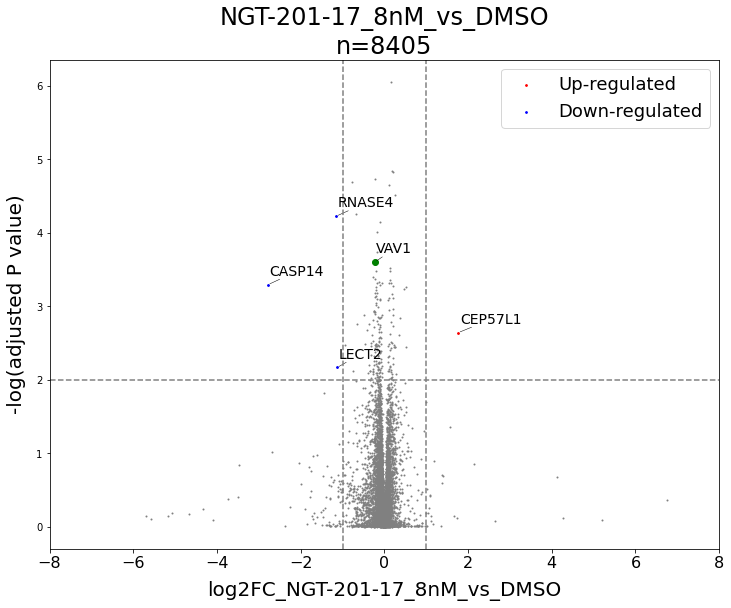

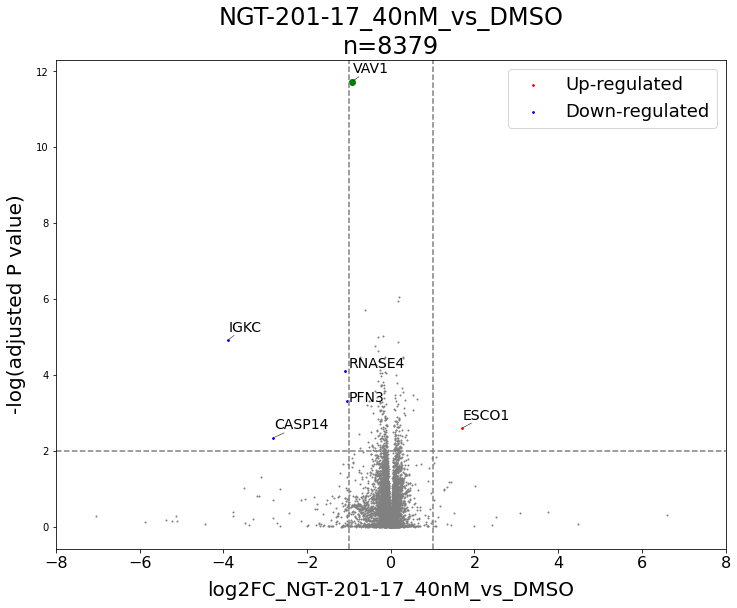

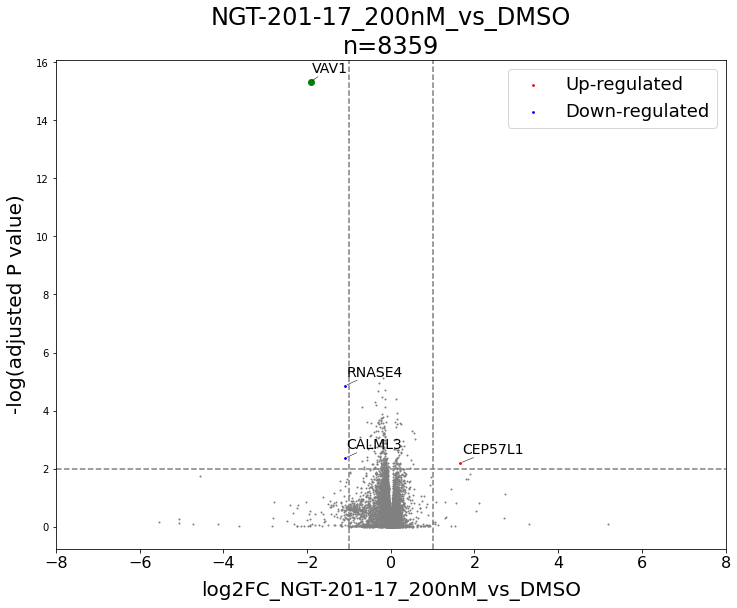

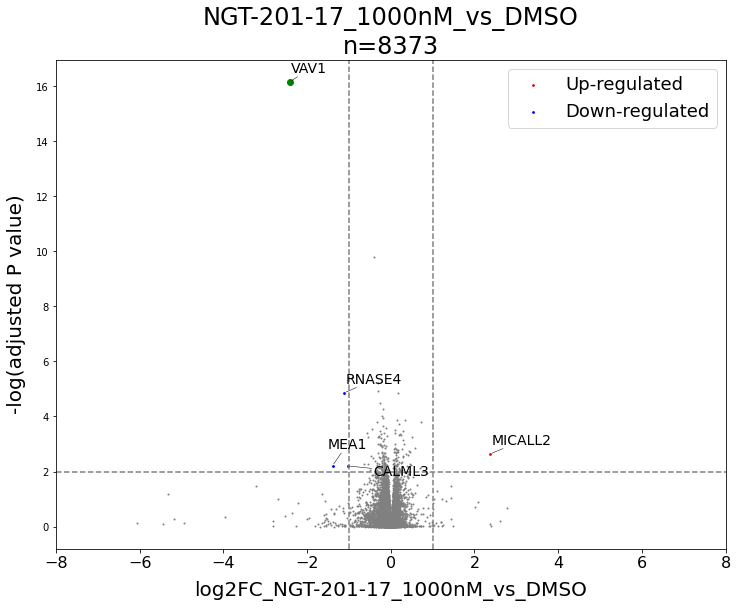

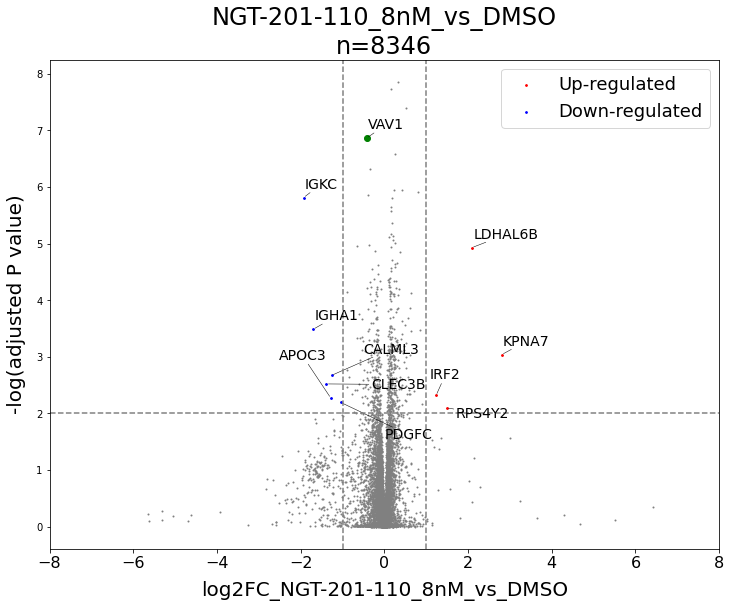

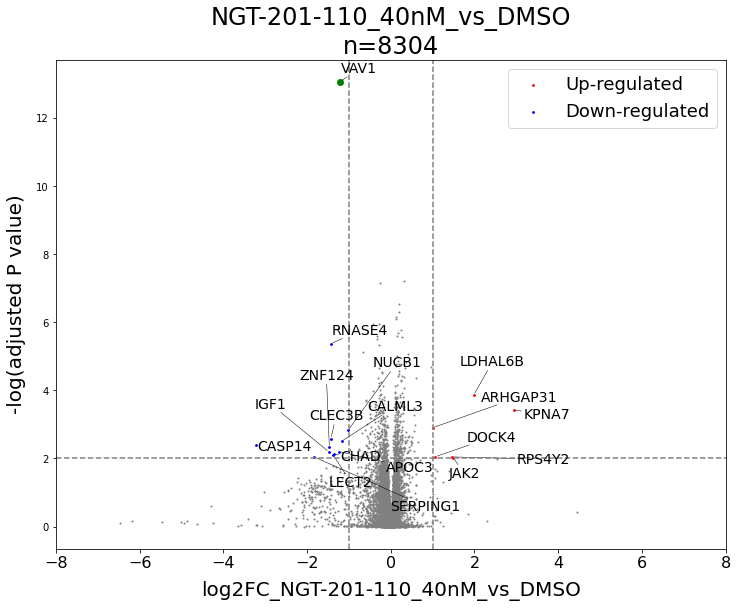

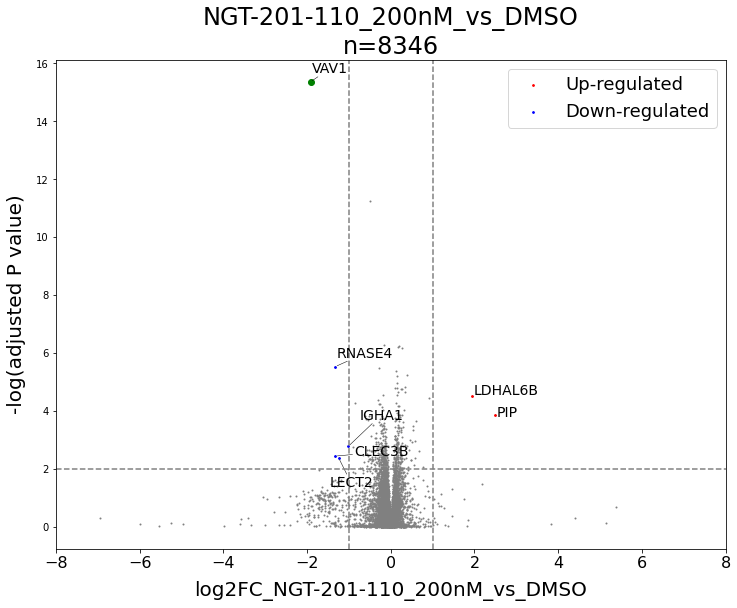

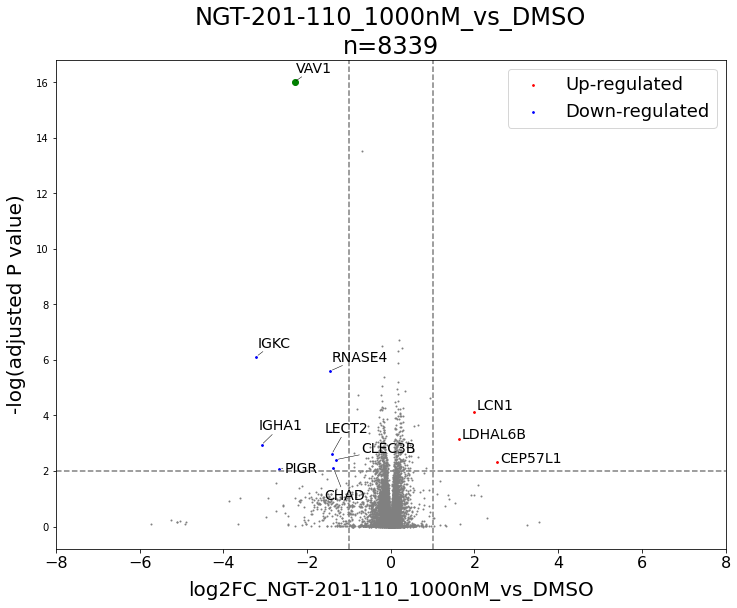

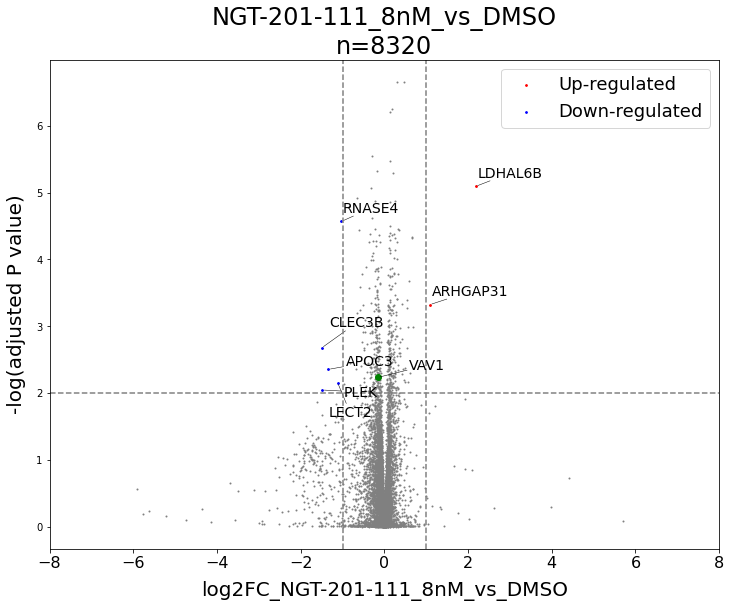

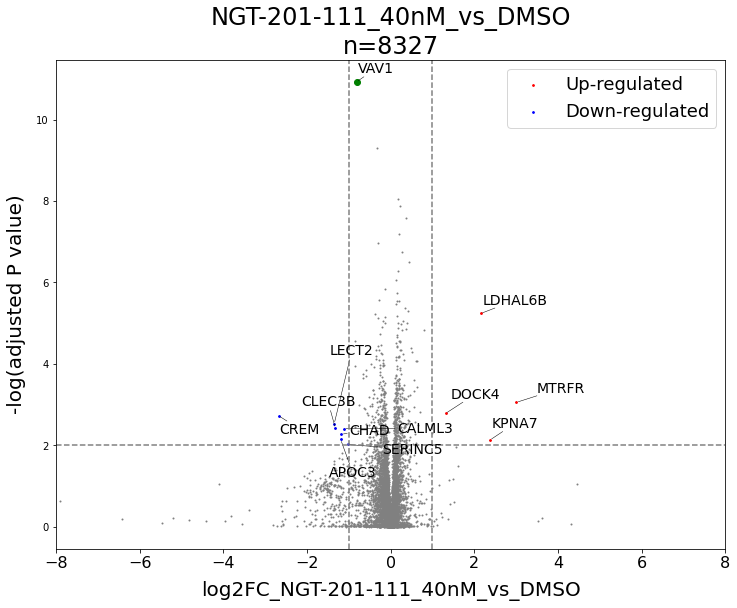

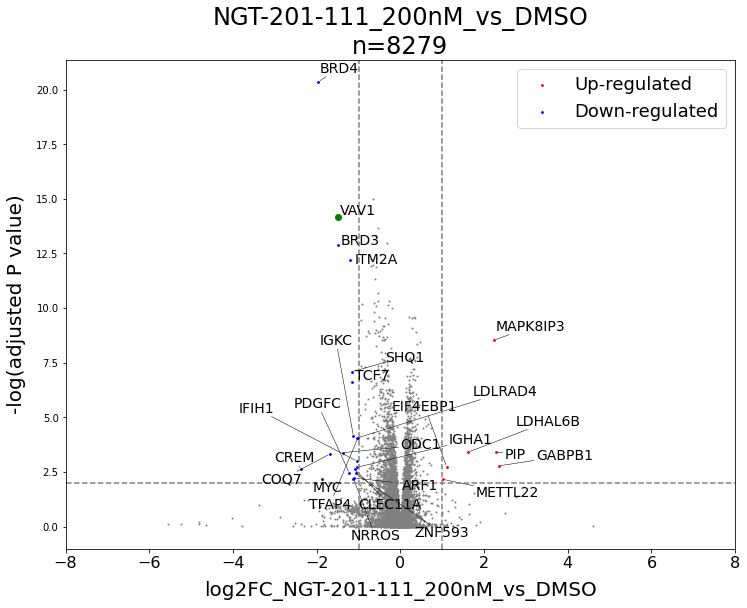

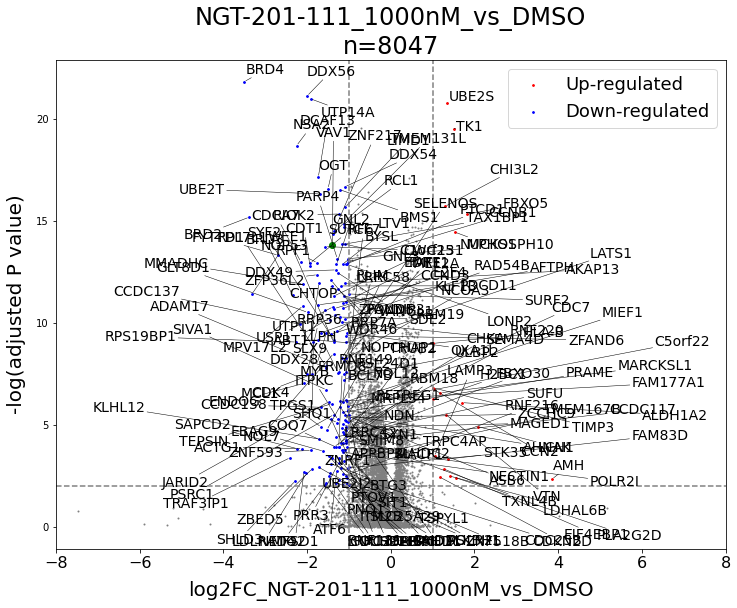

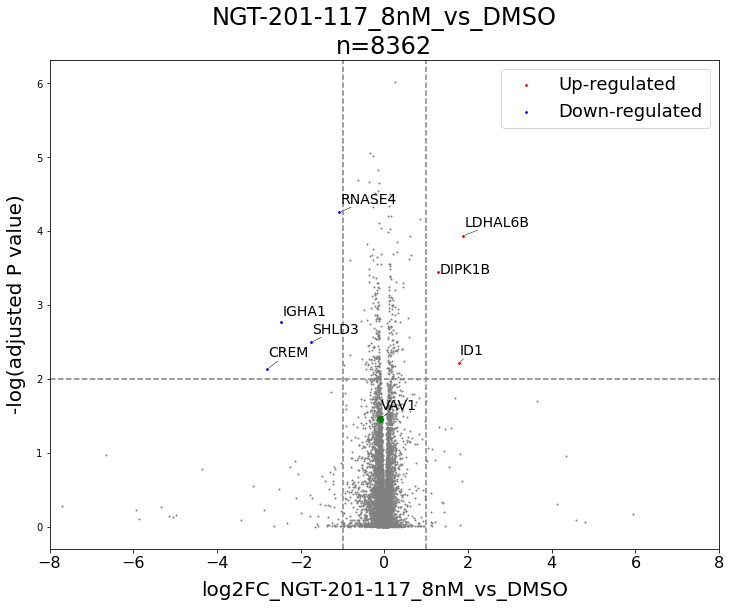

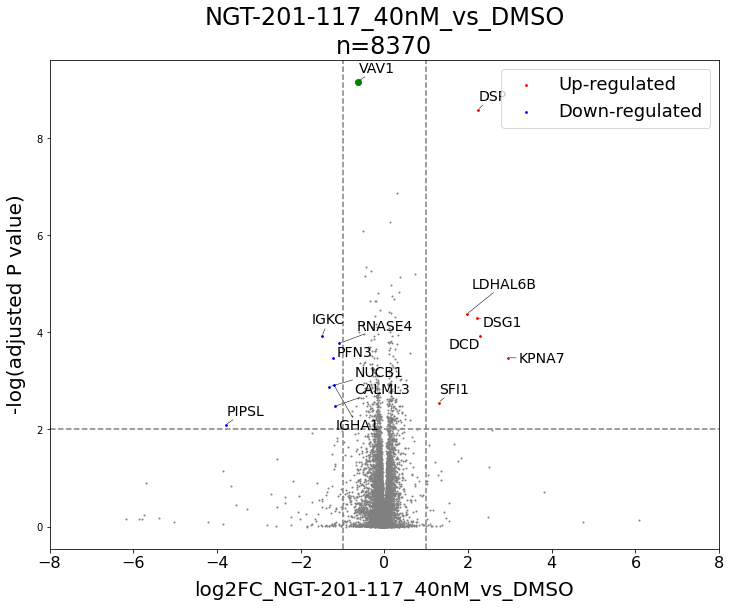

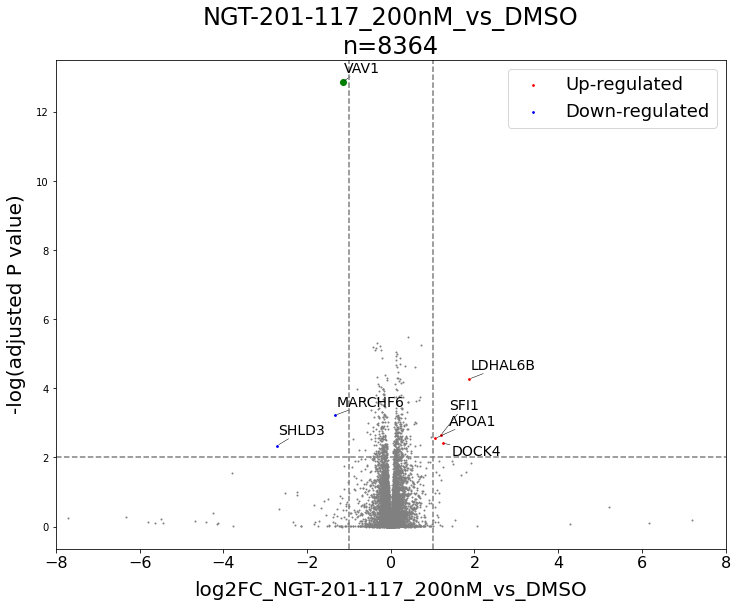

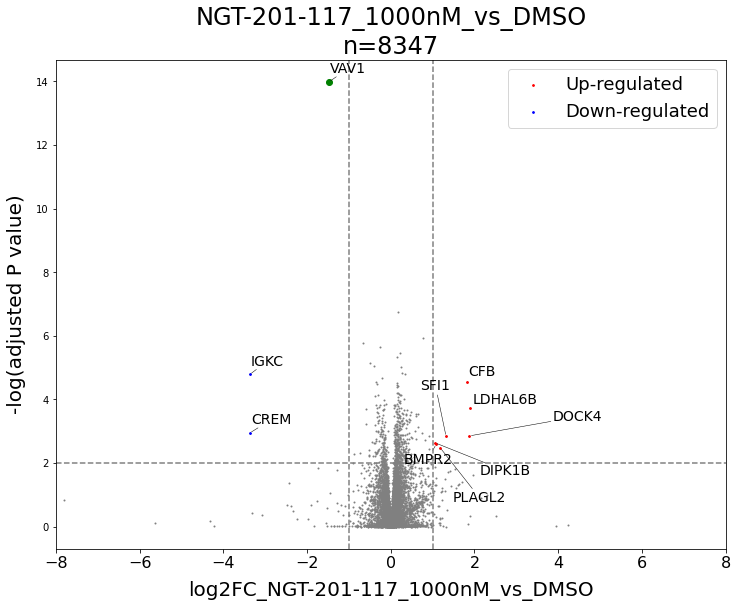

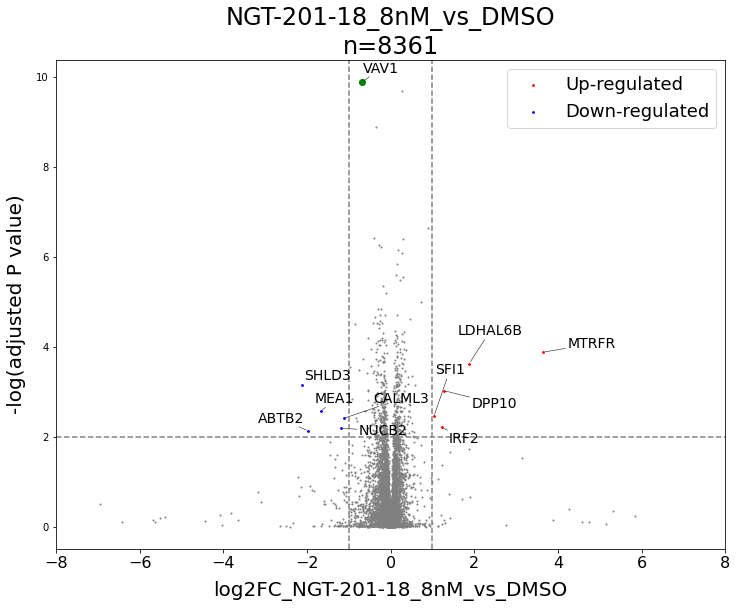

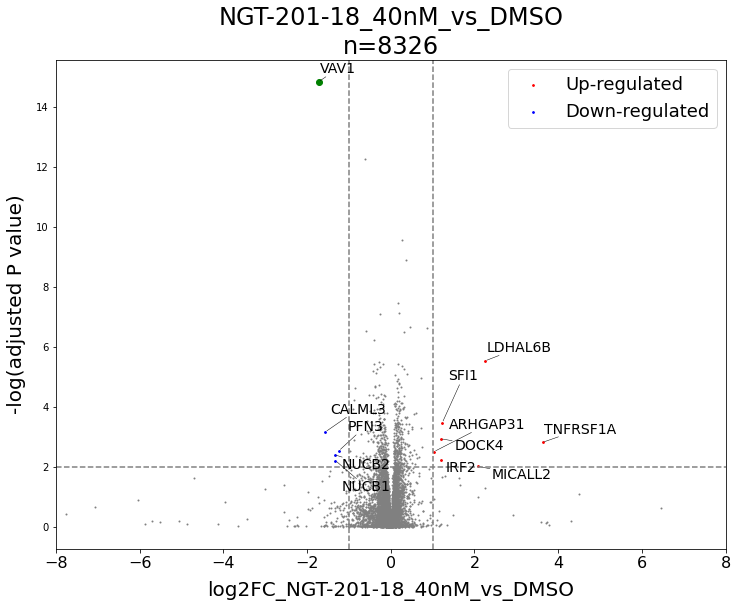

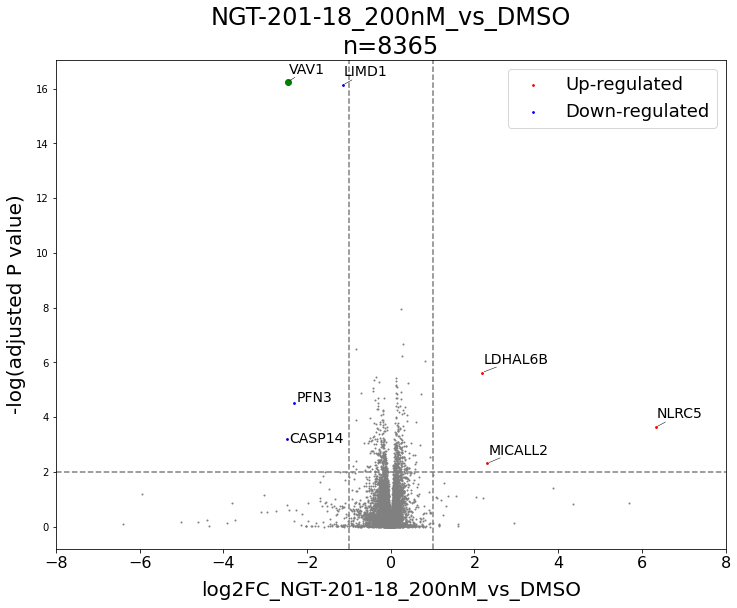

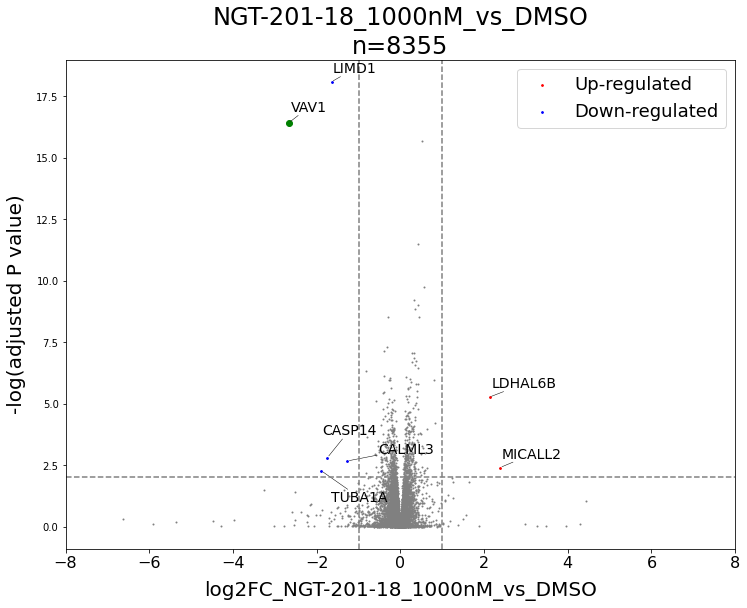

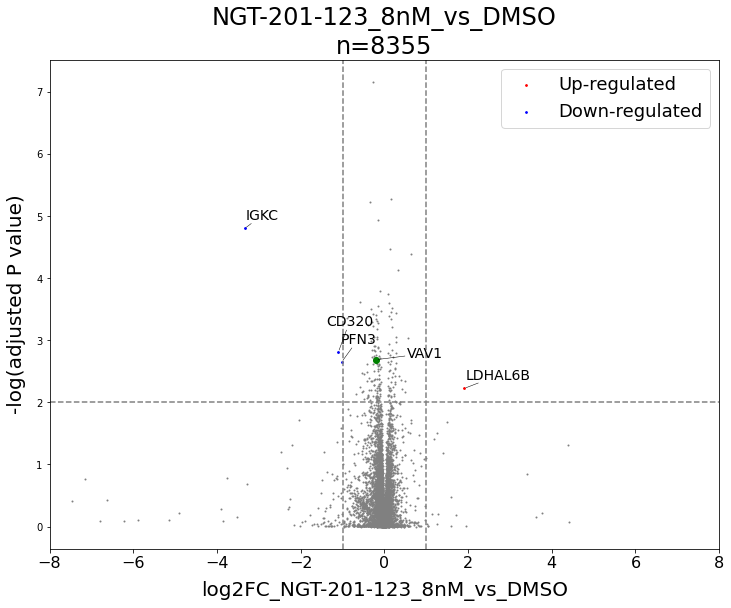

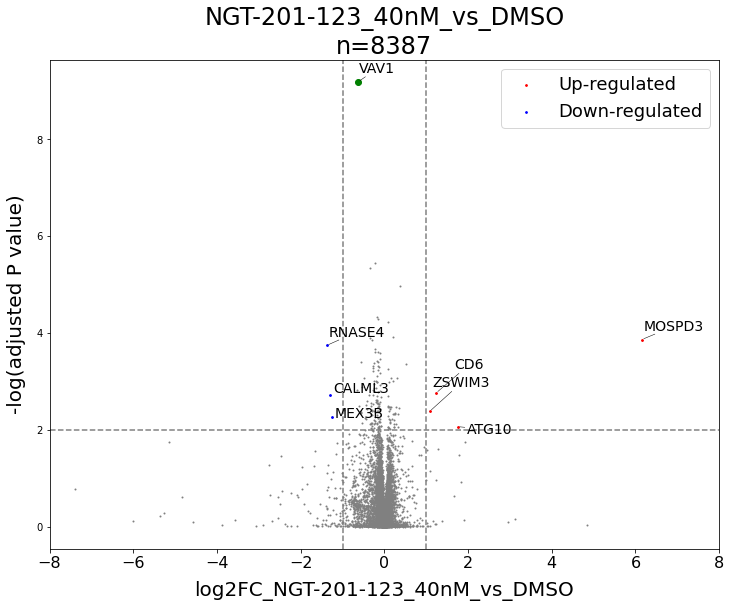

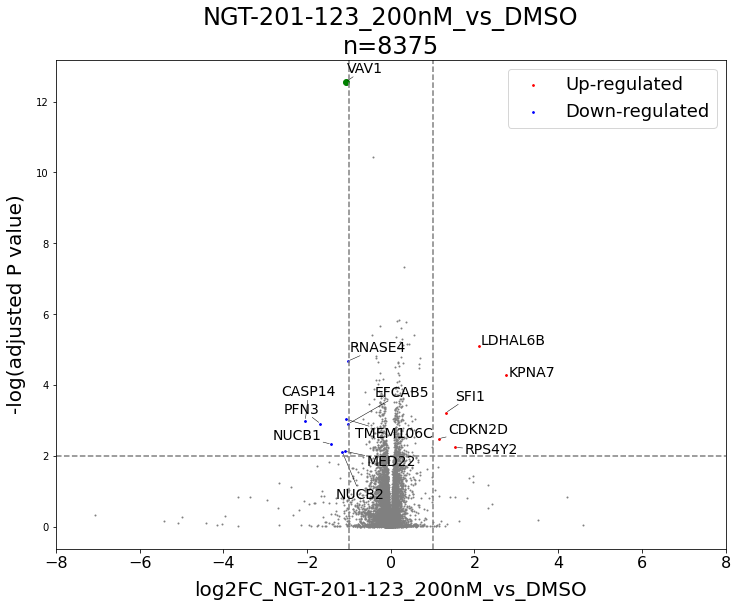

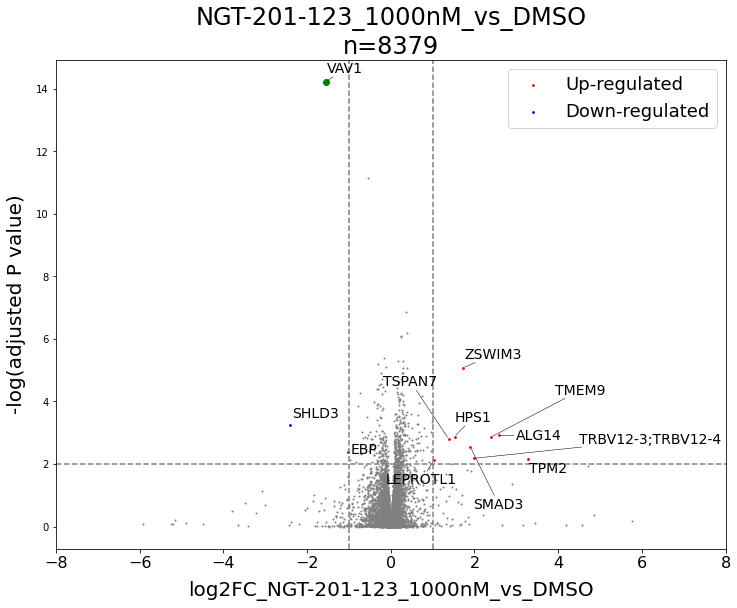

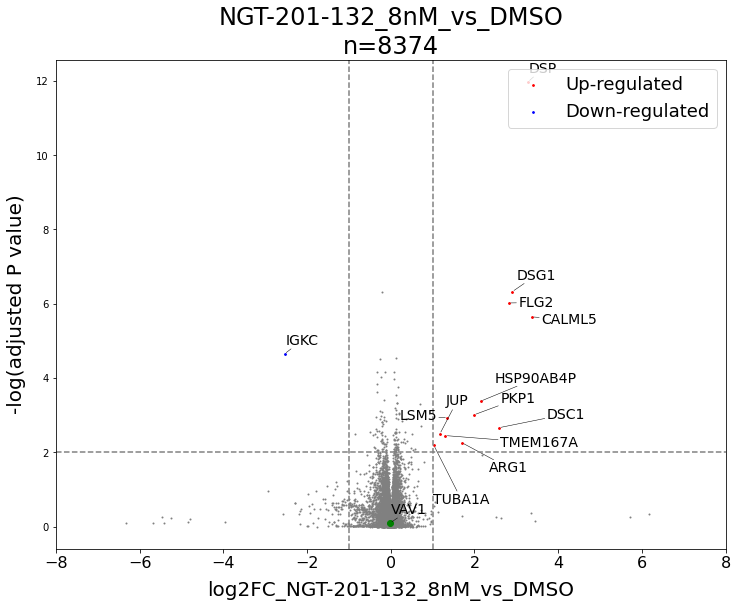

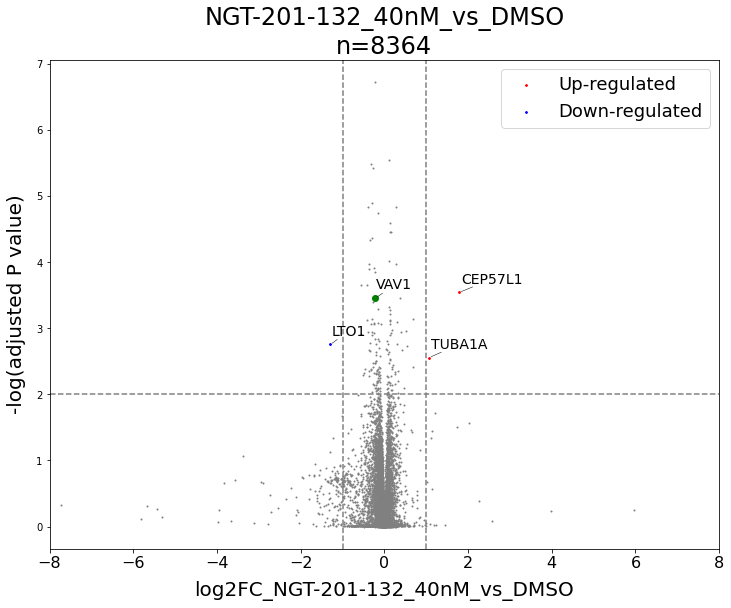

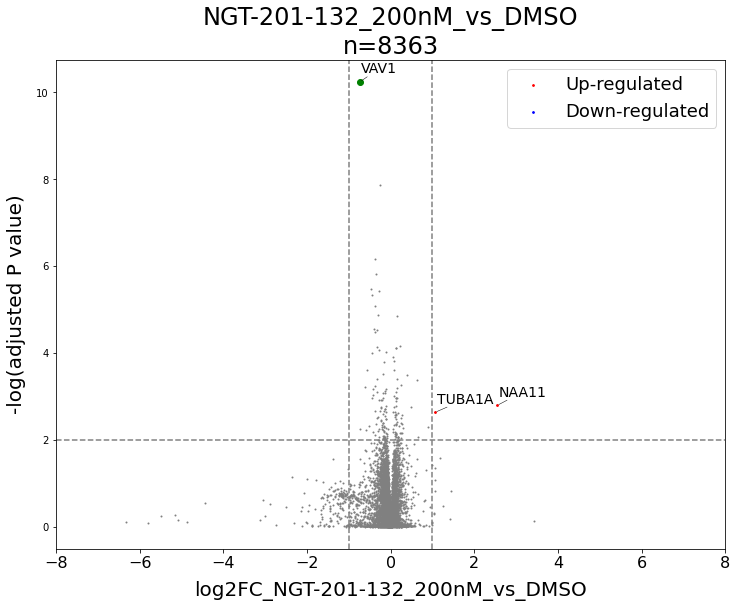

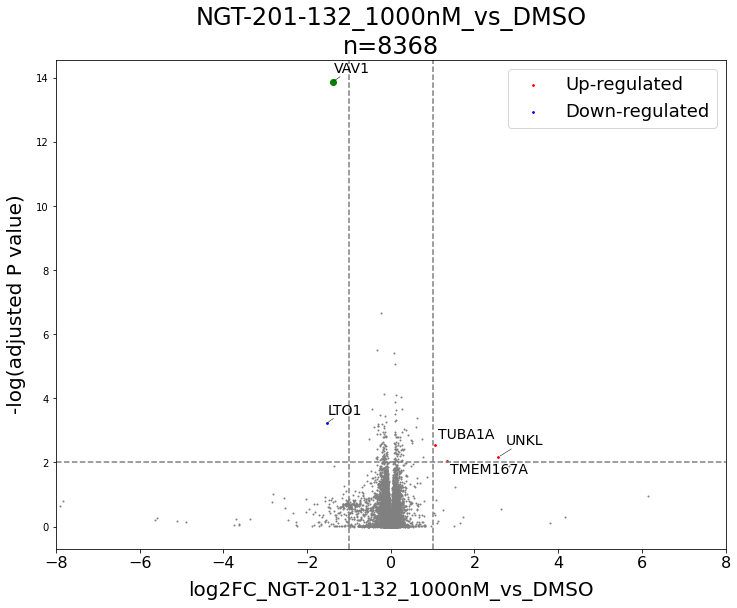

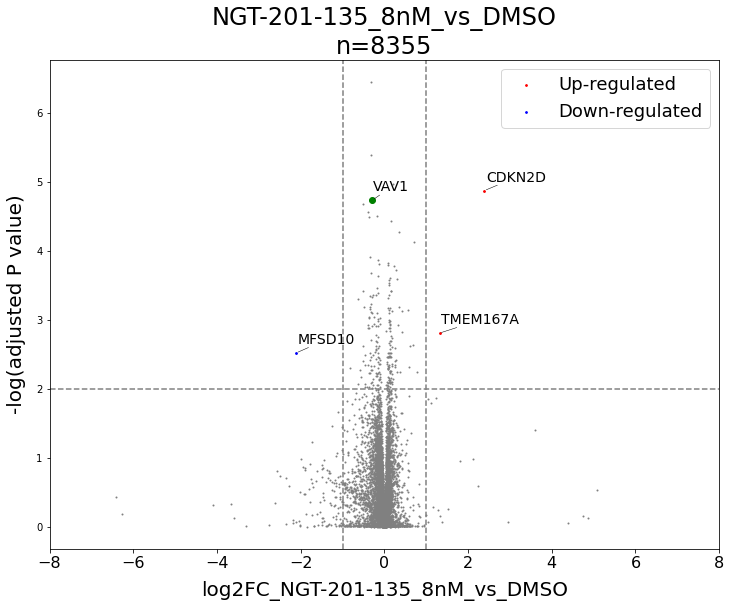

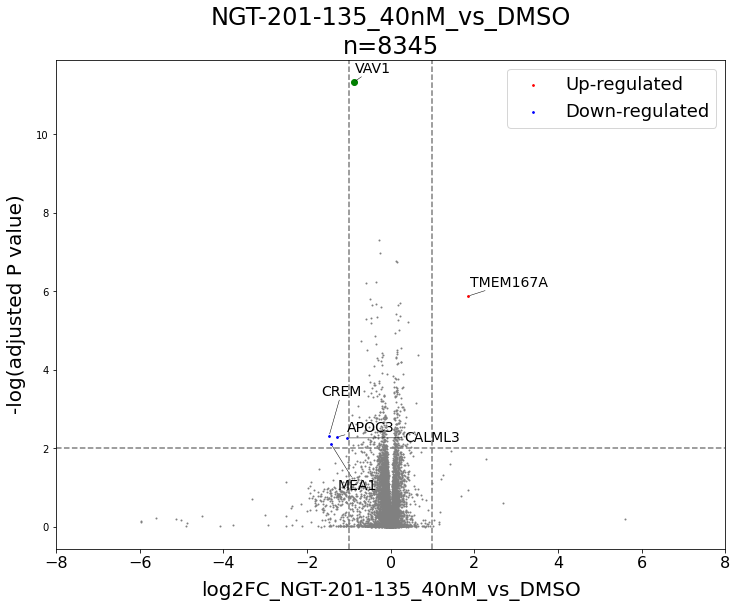

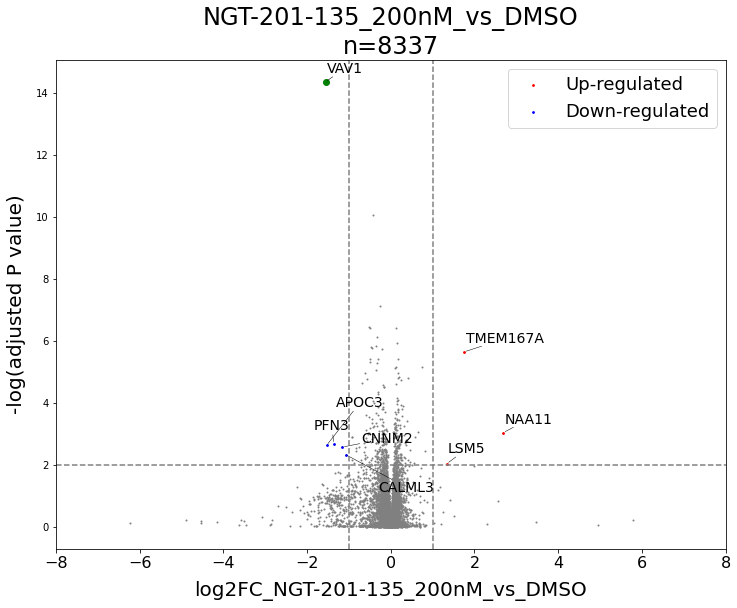

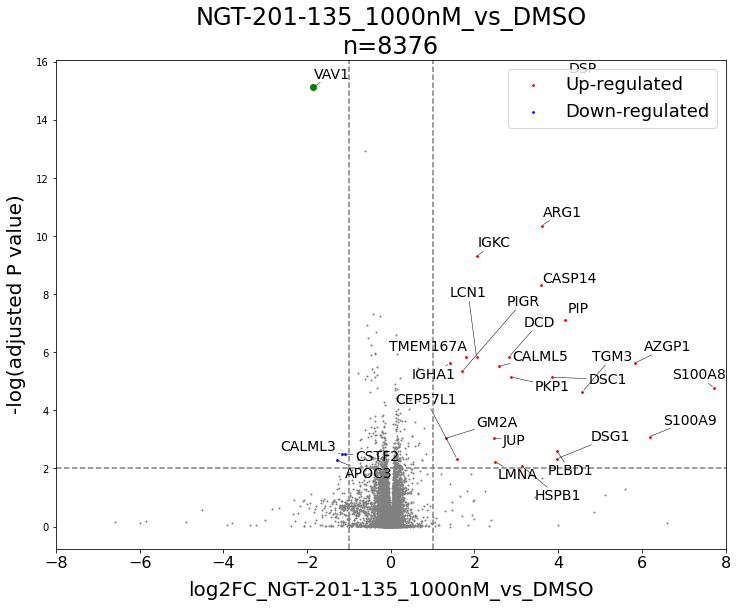

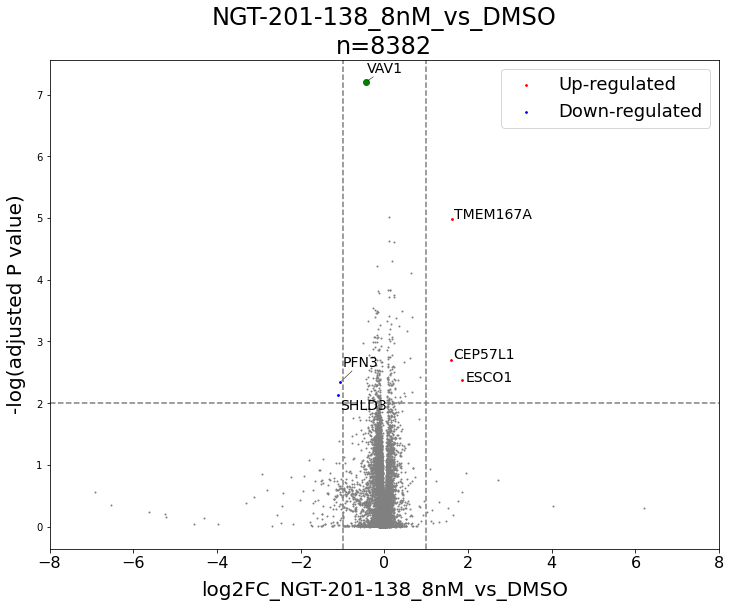

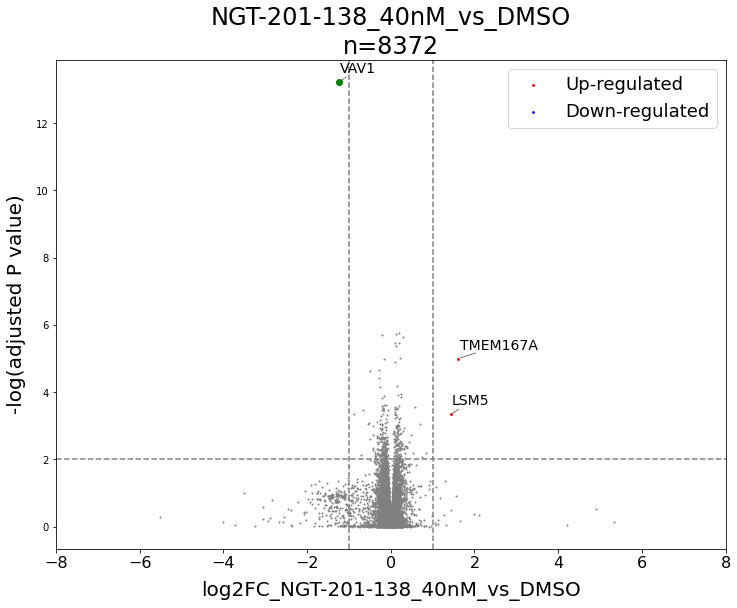

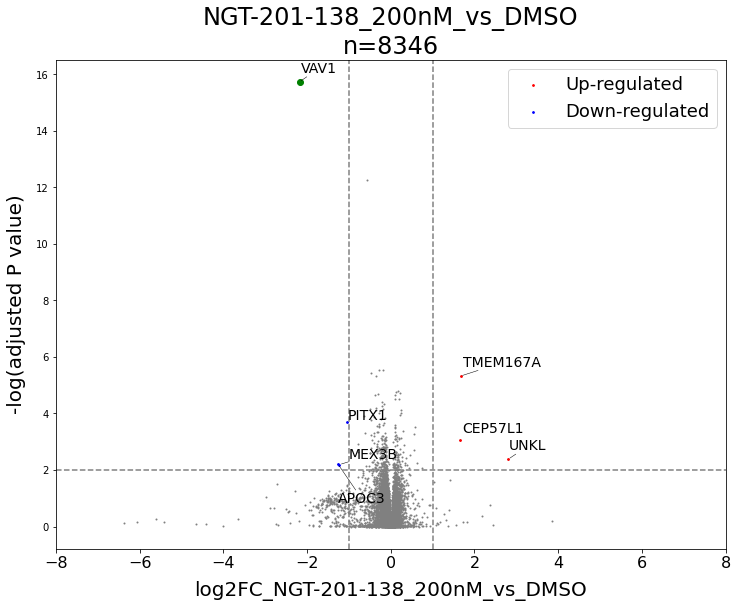

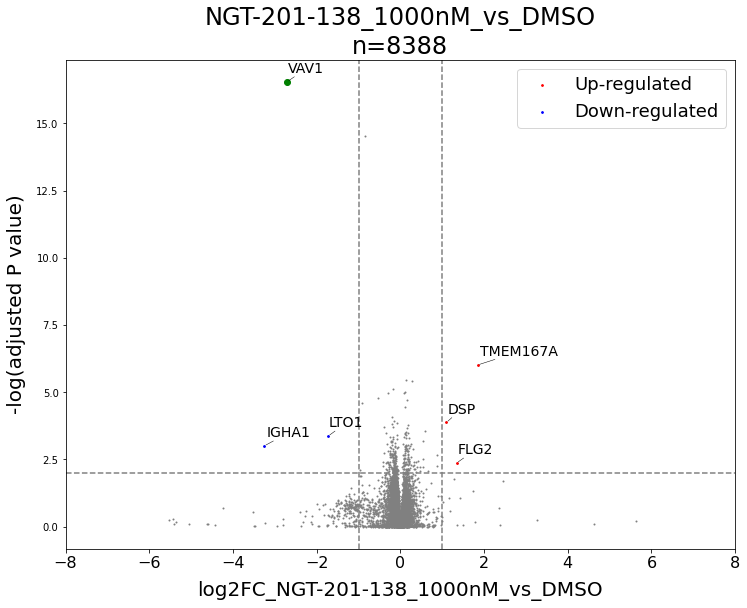

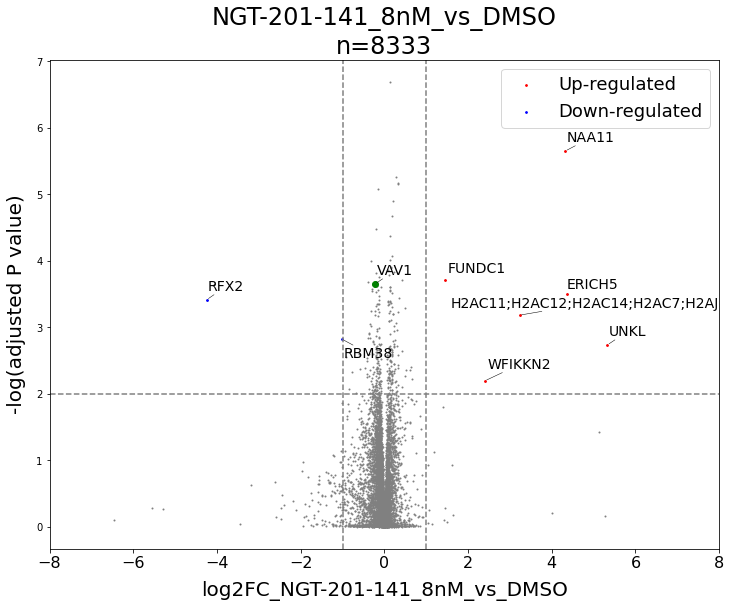

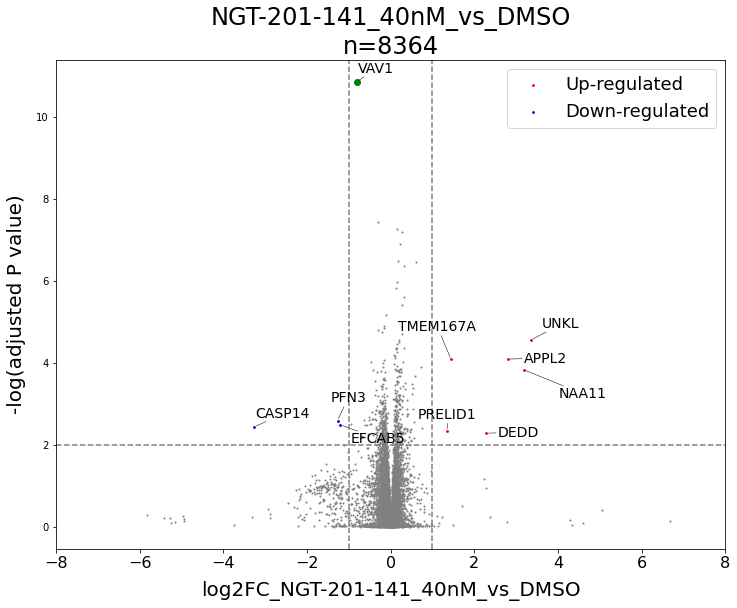

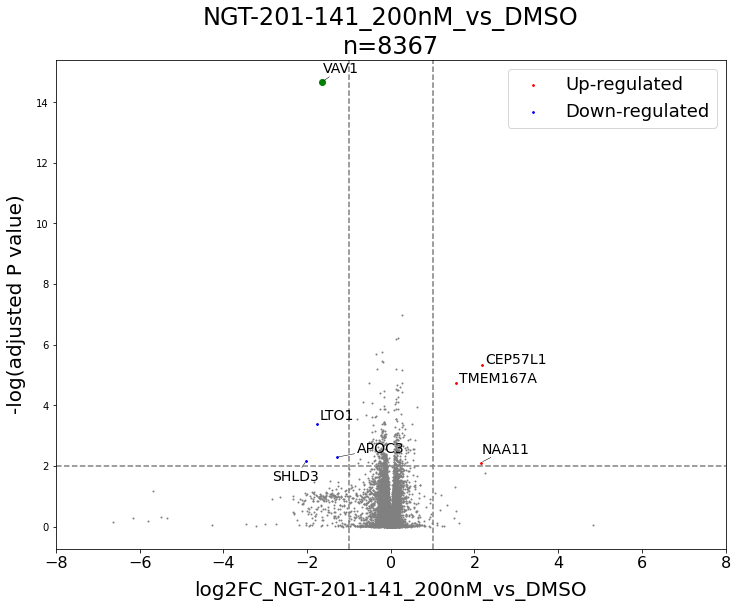

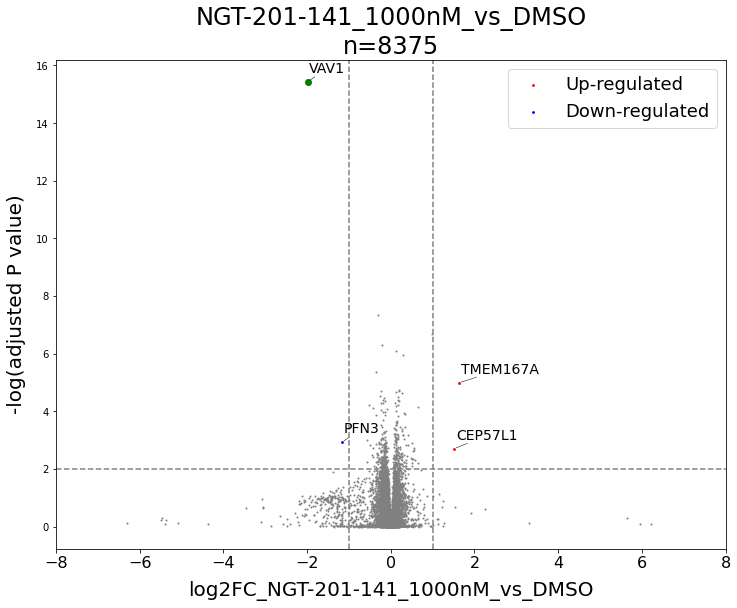

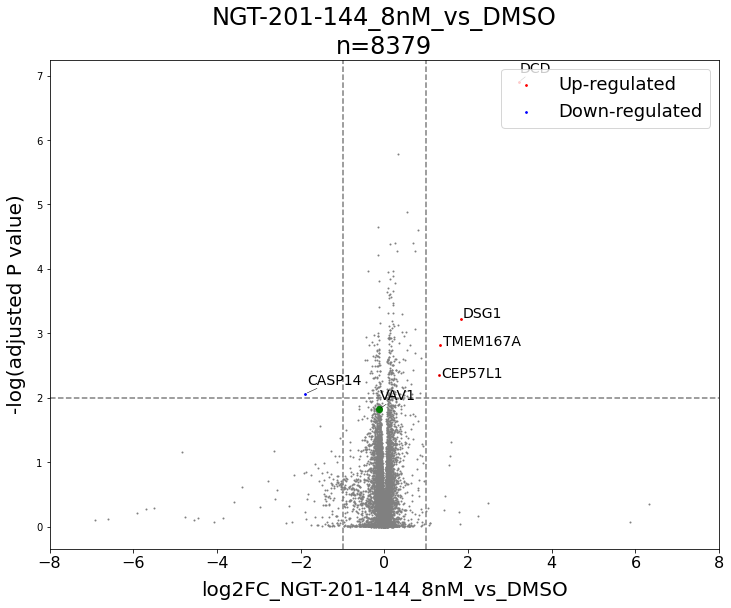

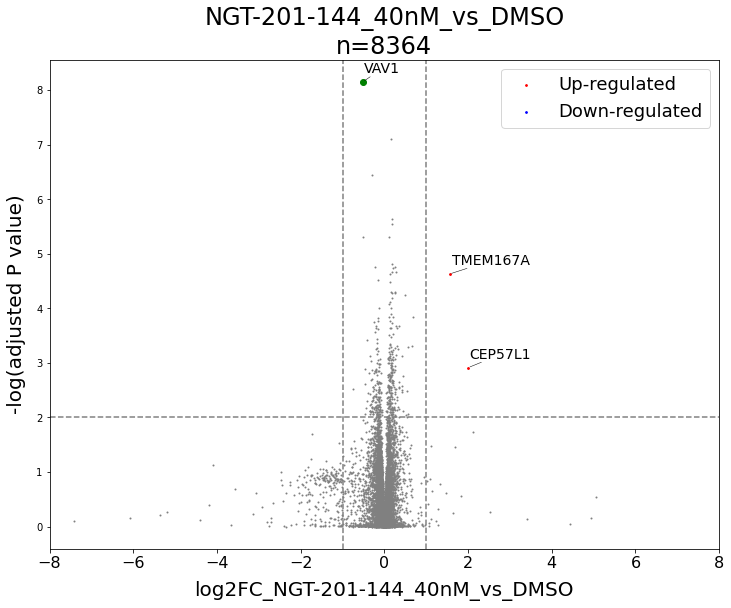

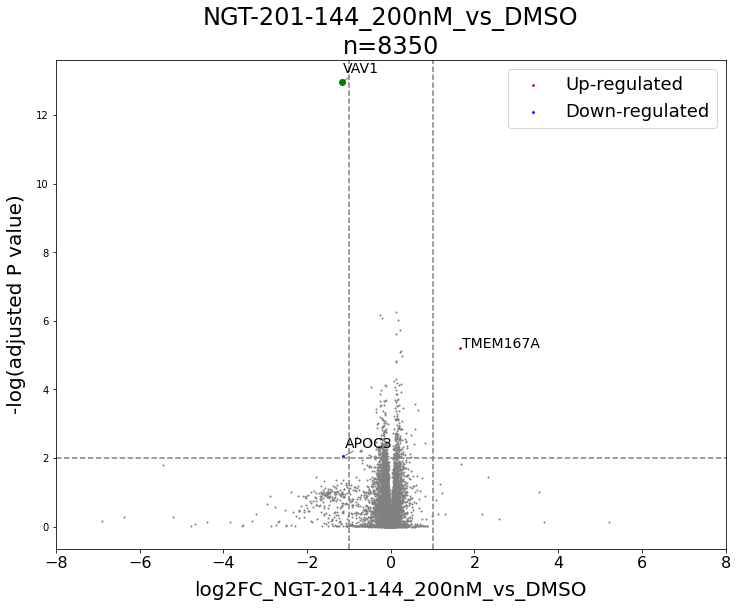

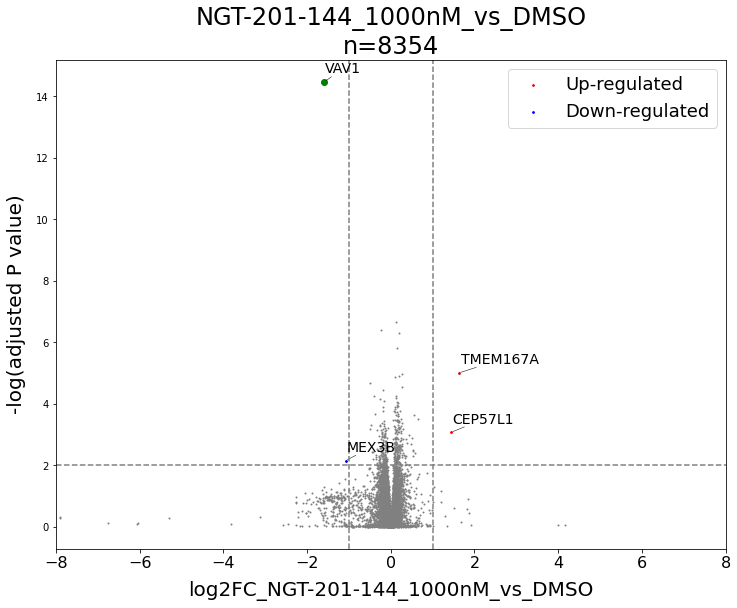

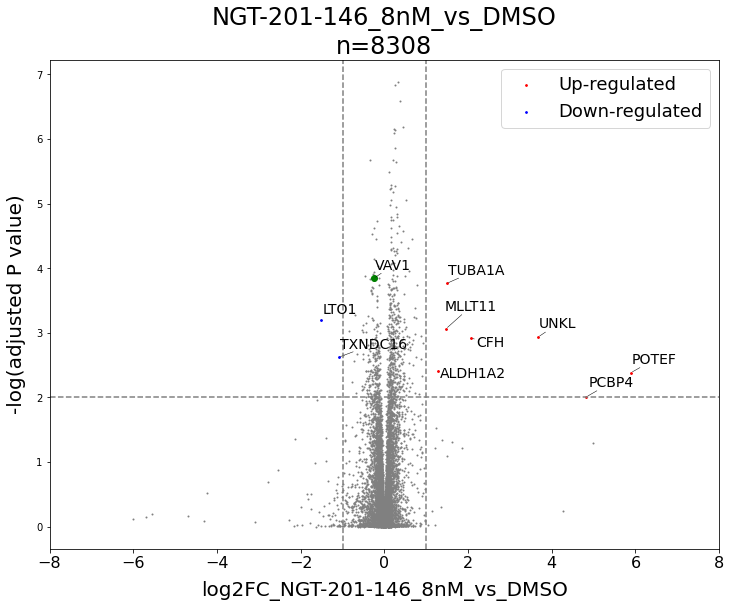

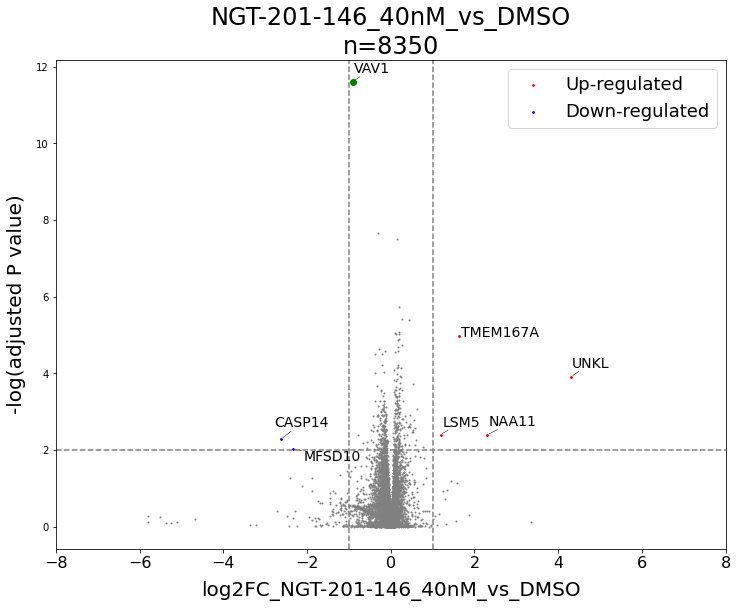

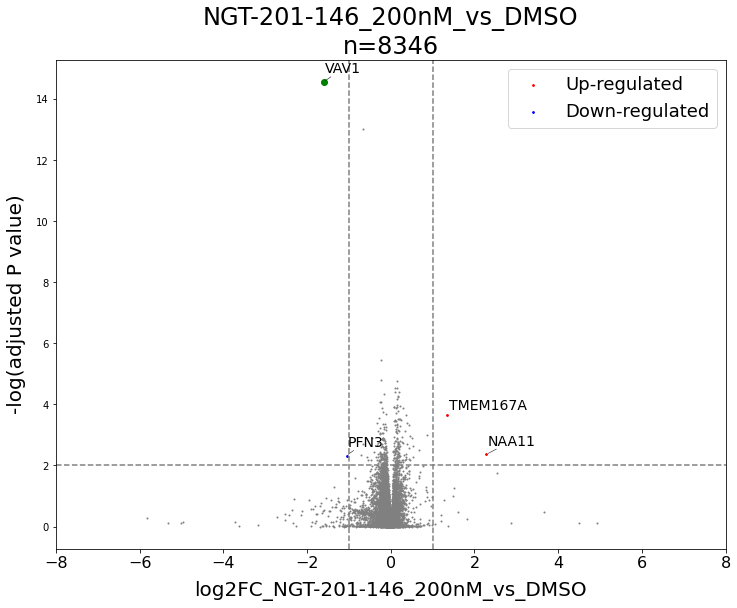

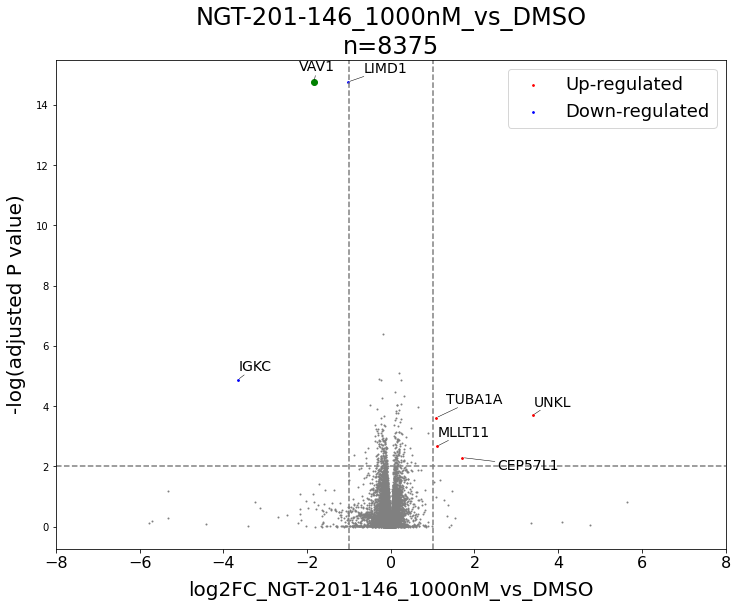

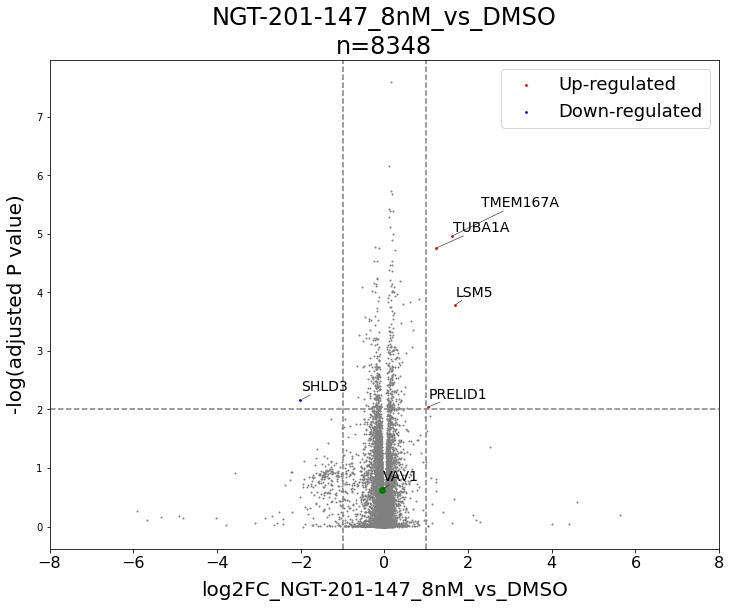

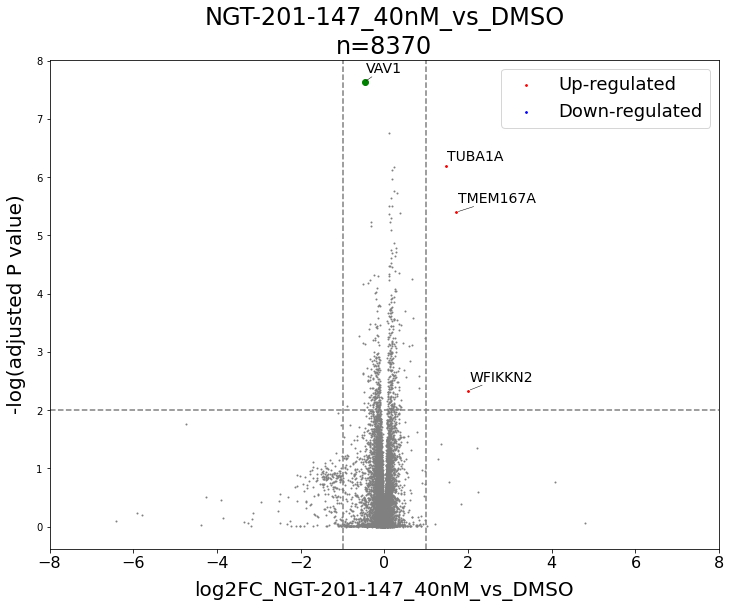

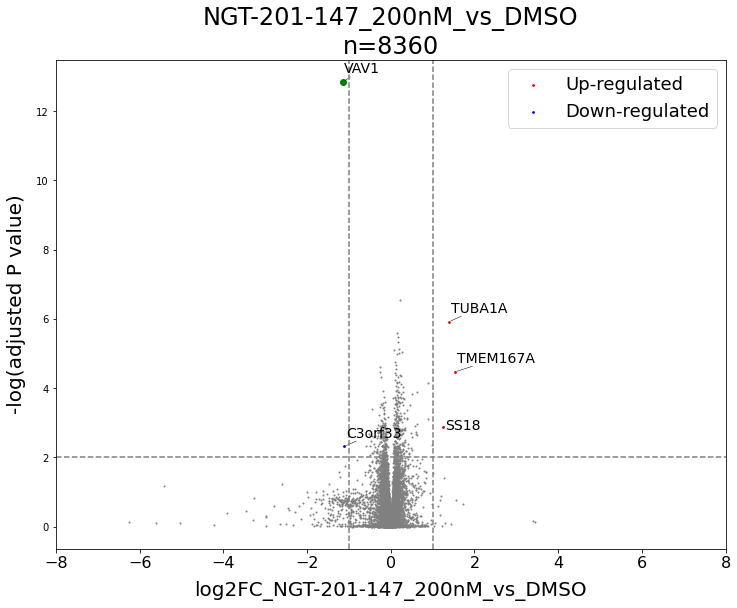

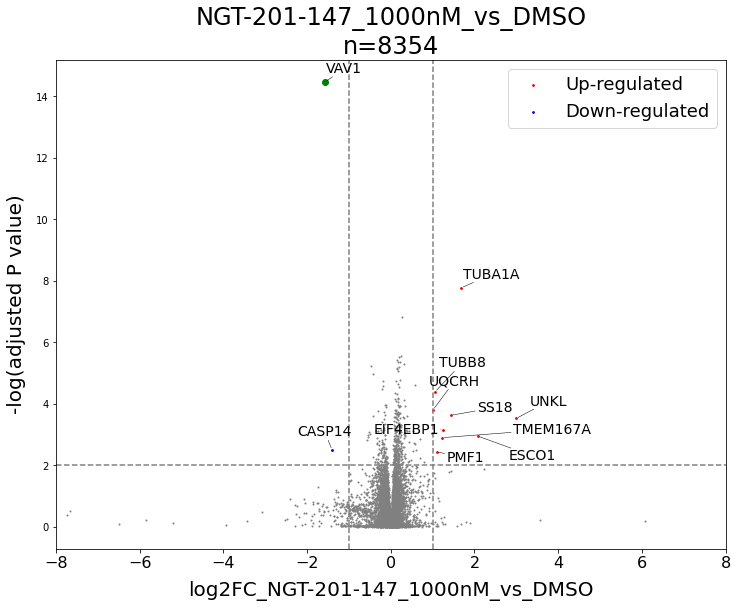

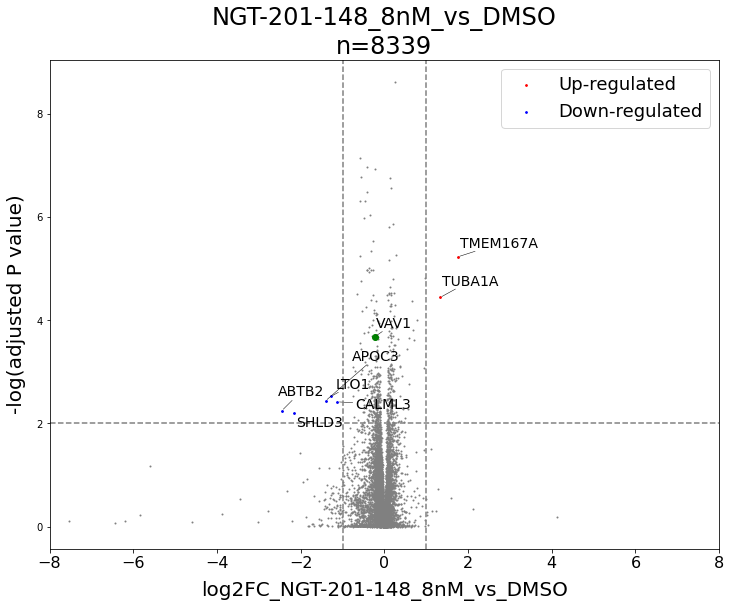

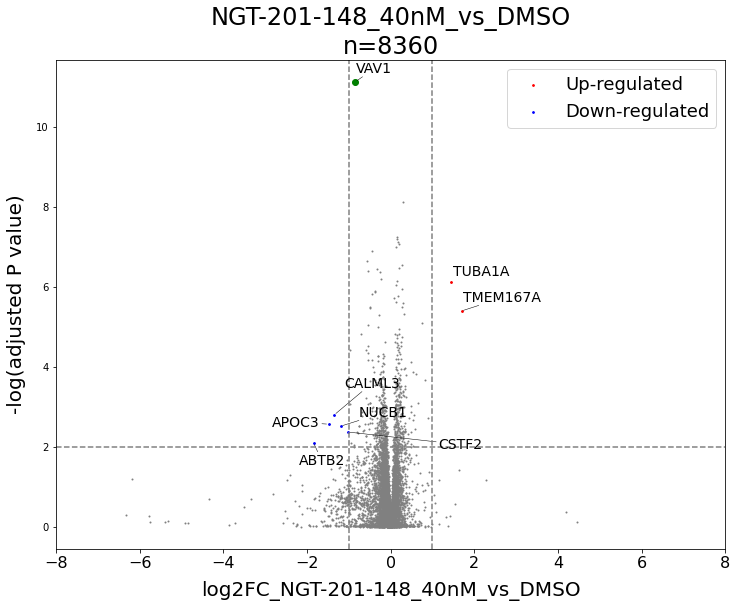

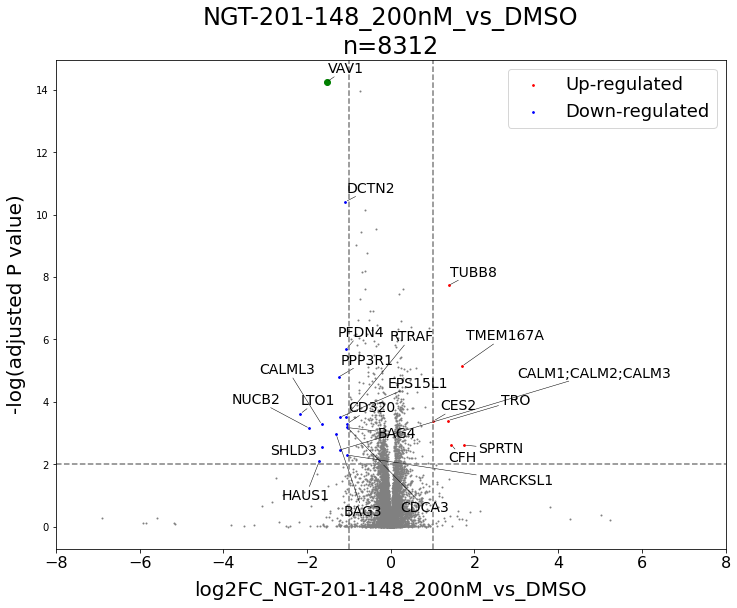

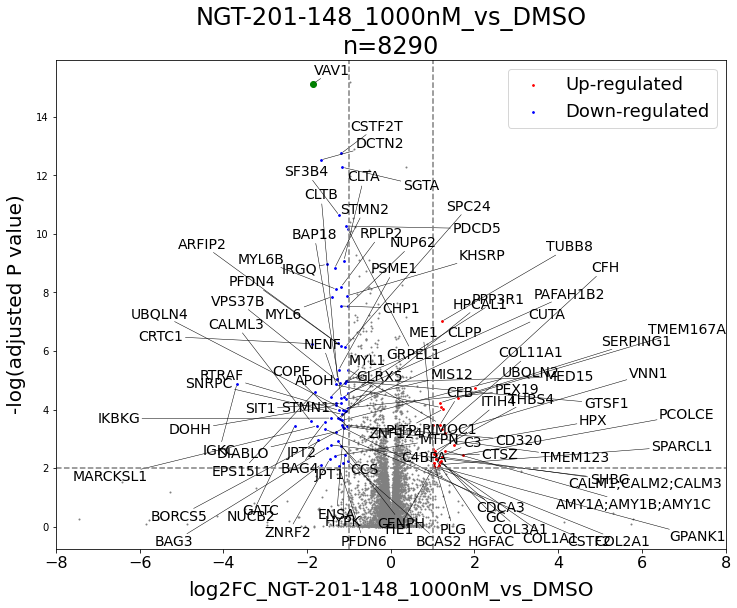

In [12]:
# volcano plot time!!
if not comparison_matrix:
    for key in group_columns:
        if key != reference_group:  # Skip the reference group
            volcano_plot(key, reference_group, FDR_cutoff=0.01, logFC_cutoff=1, highlight_genes=["P15498"], xlim=[-8,8], x_interval=2, y_interval=1, highlight_kinase=False, file_suffix="")
else: # if you have customized comparison groups
    for pair in comparison_matrix:
        volcano_plot(pair[0], pair[1], FDR_cutoff=0.01, highlight_genes=["P15498"], xlim=[-10,10],x_interval=2, file_suffix="")

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  # Use KMeans for clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, set_link_color_palette
from matplotlib.colors import rgb2hex
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.ticker import FuncFormatter
from typing import Union

def bubble_dendro_plot(SAR, SAR_suffix="", figure_filename="bubble_plot.png", fig_width=50, fig_height=50, 
                       dendro_bubble_height_ratio=[1,3], bubble_legend_width_ratio=[20,1],
                       compound_labelsize=20, protein_labelsize=20, 
                       colorFCrange=[-4,0], highlight_G_loop=0, rainbow_palette=0,
                       invert_xy=False, selected_genes=[], legend_num: Union[str, int] = "auto"):
    # SAR_suffix="_1uM_vs_DMSO"
    # highlight_G_loop can be 0:none, 1: 5res-list, 2: 8res-list
    # invert_xy: if True, swap the x and y axes and do not draw the dendrogram

    # Add suffix for SAR list
    for key in SAR:
        SAR[key] = list(map(lambda s: s + SAR_suffix, SAR[key]))

    suffix_to_group = {suffix: cluster for cluster, suffixes in SAR.items() for suffix in suffixes}
    
    # Preparing downregulated proteins for meta-analysis
    df = pd.read_csv(FILE.split(".")[0]+"_analyzed.csv", sep=",", index_col=0)

    # Bubble plot table for x=treatment, y=protein, color=FC, size=FDR
    df = df.drop(columns=df.filter(like="10uM").columns)

    # Identify log2FC and bh_FDR columns
    log2FC_columns = df.filter(regex="^log2FC_").columns

    # Extract suffixes for pairing
    log2FC_suffixes = [col.split("_", 1)[1] for col in log2FC_columns if col.split("_", 1)[1] in suffix_to_group]
    print(log2FC_suffixes)  # e.g. ['NGT20-11_8nM_vs_DMSO', 'NGT20-11_40nM_vs_DMSO',...]

    # Create a mask for filtering rows
    mask = pd.DataFrame(
        {
            suffix: (df[f"log2FC_{suffix}"] < -1) & (df[f"bh_FDR_{suffix}"] < 0.01)
            for suffix in log2FC_suffixes
        }
    ).any(axis=1)

    # Apply the mask to filter rows
    df_protein_downreg = df[mask]
    print(df_protein_downreg.shape)
    
    df_protein_downreg["Description_Genes"] = (
        df_protein_downreg["First.Protein.Description"].fillna("") + " | " + df_protein_downreg["Genes"].fillna("")
    )

    # Melt the DataFrame for plotting
    df_protein_downreg = df_protein_downreg.reset_index()
    melted_log2FC = pd.melt(
        df_protein_downreg,
        id_vars=["Description_Genes", "Protein.Group"],
        value_vars=[col for col in df_protein_downreg.columns if col.startswith("log2FC")],
        var_name="log2FC_Column",
        value_name="log2FC",
    )
    
    melted_log2FC["Suffix"] = melted_log2FC["log2FC_Column"].str.split("_", n=1).str[1]
    melted_log2FC["Group"] = melted_log2FC["Suffix"].map(suffix_to_group)
    melted_log2FC = melted_log2FC[melted_log2FC["Suffix"].isin(suffix_to_group.keys())]

    # Map bh_FDR values and calculate -log10 scale
    melted_log2FC["bh_FDR"] = melted_log2FC.apply(
        lambda row: df_protein_downreg[f"bh_FDR_{row['Suffix']}"].iloc[row.name % len(df_protein_downreg)], axis=1
    )
    melted_log2FC["bh_FDR_log10"] = -np.log10(melted_log2FC["bh_FDR"])
    melted_log2FC["bh_FDR_log10"] = np.nan_to_num(melted_log2FC["bh_FDR_log10"], nan=0)

    # Pivot to get a matrix of Description_Genes vs. log2FC values for clustering
    pivot_df = melted_log2FC.pivot_table(
        index="Description_Genes",
        columns="Suffix",
        values="log2FC"
    )
    pivot_df = pivot_df.fillna(1)

    # If selected_genes is provided, filter both pivot_df and melted_log2FC
    if selected_genes:
        pivot_df = pivot_df.loc[pivot_df.index.isin(selected_genes)]
        melted_log2FC = melted_log2FC[melted_log2FC["Description_Genes"].isin(selected_genes)]

    # Compute pairwise distances and hierarchical clustering
    distance_threshold = 3.5  # Set your cutoff distance here
    if pivot_df.shape[0] > 1:
        linkage_matrix = linkage(pivot_df, method="ward")  # Options: "ward", "average", etc.
        dendro = dendrogram(linkage_matrix, labels=pivot_df.index, no_plot=True)
        dendrogram_order = dendro["ivl"]
        # Define clusters using the distance threshold
        cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion="distance")
        pivot_df["Cluster"] = cluster_labels
    else:
        # With a single protein, simply use its order and assign a default cluster
        dendrogram_order = list(pivot_df.index)
        pivot_df["Cluster"] = 1

    # Define clusters using a distance threshold
    cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion="distance")
    pivot_df["Cluster"] = cluster_labels

    # Map cluster labels back to the original DataFrame
    cluster_mapping = pivot_df["Cluster"].to_dict()
    melted_log2FC["Cluster"] = melted_log2FC["Description_Genes"].map(cluster_mapping)

    # Convert cluster and Suffix to string (for categorical color coding)
    melted_log2FC["Cluster"] = melted_log2FC["Cluster"].astype(str)
    melted_log2FC["Suffix"] = melted_log2FC["Suffix"].astype(str)


    # Reorder categories using dendrogram order for protein descriptions
    melted_log2FC["Description_Genes"] = pd.Categorical(
        melted_log2FC["Description_Genes"],
        categories=dendrogram_order,
        ordered=True
    )
    # Order Suffix based on SAR dictionary (if needed)
    ordered_suffixes = [suffix for group in SAR.values() for suffix in group]
    melted_log2FC["Suffix"] = pd.Categorical(melted_log2FC["Suffix"], categories=ordered_suffixes, ordered=True)
    melted_log2FC.sort_values(by=["Suffix", "Description_Genes"], inplace=True)
    
    melted_log2FC.to_csv("temp.csv")

    # Define colors for groups (from SAR) and for clusters
    unique_groups = melted_log2FC["Group"].dropna().unique()
    group_colors = {group: get_cmap("tab20")(i / len(unique_groups)) for i, group in enumerate(unique_groups)}
    melted_log2FC["Group_Color"] = melted_log2FC["Group"].map(group_colors)
    unique_clusters = melted_log2FC["Cluster"].unique()
    cluster_colors = {cluster: get_cmap("tab20")(i / len(unique_clusters)) for i, cluster in enumerate(unique_clusters)}
    melted_log2FC["Cluster_Color"] = melted_log2FC["Cluster"].map(cluster_colors)
    
    Description_Genes_UniprotID_dict = df_protein_downreg.set_index("Description_Genes")["Protein.Group"].to_dict()  # {"proteinA|geneA": uniprotID, ...}

    # Set up figure and GridSpec depending on invert_xy flag
    if not invert_xy:
        # Layout with dendrogram (2 rows x 2 columns)
        fig = plt.figure(figsize=(fig_width, fig_height))
        gs = GridSpec(2, 2, figure=fig, height_ratios=dendro_bubble_height_ratio, width_ratios=bubble_legend_width_ratio)
        # Dendrogram subplot
        ax_dendro = fig.add_subplot(gs[0, 0])
        dendro = dendrogram(
            linkage_matrix,
            labels=pivot_df.index,
            leaf_rotation=90,
            distance_sort="ascending",
            color_threshold=0,
            above_threshold_color="black",
            ax=ax_dendro
        )
        ax_dendro.set_title("", fontsize=16)
        ax_dendro.set_xticks([])
        ax_dendro.set_ylabel("Distance", fontsize=30)
        # Bubble plot subplot below dendrogram
        ax_bubble = fig.add_subplot(gs[1, 0])
    else:
        # Layout without dendrogram (1 row x 2 columns)
        fig = plt.figure(figsize=(fig_width, fig_height))
        gs = GridSpec(1, 2, figure=fig, width_ratios=bubble_legend_width_ratio)
        ax_bubble = fig.add_subplot(gs[0, 0])

    # Plotting the bubble scatter plot with (x, y) depending on invert_xy.
    if not invert_xy:
        scatter = ax_bubble.scatter(
            melted_log2FC["Description_Genes"],  # x-axis: protein descriptions
            melted_log2FC["Suffix"],             # y-axis: treatment suffixes
            c=melted_log2FC["log2FC"],            # color by log2FC
            s=melted_log2FC["bh_FDR_log10"] * 500,  # size proportional to -log10(FDR)
            cmap=get_cmap("Spectral").reversed() if rainbow_palette else "coolwarm",
            alpha=0.7,
            edgecolors="w",
            clip_on=False,
        )
    else:
        scatter = ax_bubble.scatter(
            melted_log2FC["Suffix"],              # x-axis: treatment suffixes
            melted_log2FC["Description_Genes"],   # y-axis: protein descriptions
            c=melted_log2FC["log2FC"],
            s=melted_log2FC["bh_FDR_log10"] * 500,
            cmap=get_cmap("Spectral").reversed() if rainbow_palette else "coolwarm",
            alpha=0.7,
            edgecolors="w",
            clip_on=False,
        )

    # Set up legend/colorbar axes (adjust GridSpec nested location based on invert_xy)
    if not invert_xy:
        gs_nested = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 1], height_ratios=[2, 3])
        ax_empty = fig.add_subplot(gs_nested[0, 0])
        ax_empty.axis('off')
        ax_cbar = fig.add_subplot(gs_nested[1, :])    
    else:
        gs_nested = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0, 1], width_ratios=[2, 3])
        ax_empty = fig.add_subplot(gs_nested[0, 0])
        ax_empty.axis('off')
        ax_cbar = fig.add_subplot(gs_nested[:, 1])

    cbar = plt.colorbar(scatter, cax=ax_cbar, shrink=0.8, location="left", ticklocation="right")
    cbar.set_label("Log2FC Value", fontsize=50, rotation=270, labelpad=50)
    ax_cbar.tick_params(labelsize=50)
    ax_cbar.set_aspect(5)
    scatter.set_clim(colorFCrange[0], colorFCrange[1])

    # Create size legend from scatter elements
    handles, labels = scatter.legend_elements(
        prop="sizes", alpha=0.6, num=legend_num+1 if legend_num is int else legend_num, func=lambda s: s / 500,
        fmt=FuncFormatter(lambda x, pos: f"{x:.2f}")
    )
    new_labels = [f"P.adj = {10**(-float(l)):.2g}" for l in labels]
    ax_empty.legend(handles=handles, labels=new_labels, title="", fontsize=40,
                    labelspacing=1.5, borderaxespad=0.8, handleheight=0.2)

    # Color axis tick labels appropriately.
    if not invert_xy:
        # In standard mode: x-axis labels (proteins) colored by cluster, y-axis labels (suffixes) colored by SAR group.
        for label in ax_bubble.get_xticklabels():
            description = label.get_text()
            if description in melted_log2FC["Description_Genes"].values:
                cluster_id = melted_log2FC.loc[melted_log2FC["Description_Genes"] == description, "Cluster"].iloc[0]
                label.set_color(cluster_colors[cluster_id])
            # Highlight if needed (using external g_loop_5res_noEC / g_loop_8res_noEC)
            if highlight_G_loop == 1:
                if (description in Description_Genes_UniprotID_dict) and (Description_Genes_UniprotID_dict[description] in g_loop_5res_noEC):
                    label.set_bbox(dict(facecolor="pink", edgecolor="none", alpha=0.3))
            if highlight_G_loop == 2:
                if (description in Description_Genes_UniprotID_dict) and (Description_Genes_UniprotID_dict[description] in g_loop_8res_noEC):
                    label.set_bbox(dict(facecolor="grey", edgecolor="none", alpha=0.3))
        for label in ax_bubble.get_yticklabels():
            group = label.get_text()
            if suffix_to_group.get(group) in group_colors:
                label.set_color(group_colors[suffix_to_group[group]])
    else:
        # In invert mode: now x-axis labels are suffixes and y-axis labels are proteins.
        for label in ax_bubble.get_xticklabels():
            group = label.get_text()
            if suffix_to_group.get(group) in group_colors:
                label.set_color(group_colors[suffix_to_group[group]])
        for label in ax_bubble.get_yticklabels():
            description = label.get_text()
            if description in melted_log2FC["Description_Genes"].values:
                cluster_id = melted_log2FC.loc[melted_log2FC["Description_Genes"] == description, "Cluster"].iloc[0]
                label.set_color(cluster_colors[cluster_id])
            if highlight_G_loop == 1:
                if (description in Description_Genes_UniprotID_dict) and (Description_Genes_UniprotID_dict[description] in g_loop_5res_noEC):
                    label.set_bbox(dict(facecolor="grey", edgecolor="none", alpha=0.3))
            if highlight_G_loop == 2:
                if (description in Description_Genes_UniprotID_dict) and (Description_Genes_UniprotID_dict[description] in g_loop_8res_noEC):
                    label.set_bbox(dict(facecolor="grey", edgecolor="none", alpha=0.3))

    # Adjust axis labels, tick parameters, and grid.
    if not invert_xy:
        ax_bubble.set_xlabel("")
        ax_bubble.tick_params(axis='x', rotation=45, labelsize=protein_labelsize)
        for label in ax_bubble.get_xticklabels():
            label.set_ha('right')
        ax_bubble.set_xlim(-0.5, len(set(melted_log2FC["Description_Genes"])) - 0.5)
        ax_bubble.set_ylabel("")
        ax_bubble.invert_yaxis()
        ax_bubble.tick_params(axis='y', labelsize=compound_labelsize, pad=20)
    else:
        ax_bubble.set_xlabel("")
        ax_bubble.tick_params(axis='x', rotation=60, labelsize=protein_labelsize)
        for label in ax_bubble.get_xticklabels():
            label.set_ha('right')
        ax_bubble.set_ylabel("")
        ax_bubble.tick_params(axis='y', labelsize=compound_labelsize, pad=20)
        # Optionally, adjust limits if necessary:
        ax_bubble.set_xlim(-0.5, len(set(melted_log2FC["Suffix"])) - 0.5)

    # Title and grid settings.
    if not invert_xy:
        ax_dendro.set_title("VAV1 Glue Degradome", fontsize=80, pad=10)
    ax_bubble.grid(True, linestyle="--", alpha=0.5)
    for spine in ax_bubble.spines.values():
        spine.set_visible(False)
    
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    plt.tight_layout()
    plt.savefig(figure_filename, dpi=200)
    plt.show()

    

['NGT-201-17_8nM_vs_DMSO', 'NGT-201-17_40nM_vs_DMSO', 'NGT-201-17_200nM_vs_DMSO', 'NGT-201-17_1000nM_vs_DMSO', 'NGT-201-110_8nM_vs_DMSO', 'NGT-201-110_40nM_vs_DMSO', 'NGT-201-110_200nM_vs_DMSO', 'NGT-201-110_1000nM_vs_DMSO', 'NGT-201-111_8nM_vs_DMSO', 'NGT-201-111_40nM_vs_DMSO', 'NGT-201-117_8nM_vs_DMSO', 'NGT-201-117_40nM_vs_DMSO', 'NGT-201-117_200nM_vs_DMSO', 'NGT-201-117_1000nM_vs_DMSO', 'NGT-201-18_8nM_vs_DMSO', 'NGT-201-18_40nM_vs_DMSO', 'NGT-201-18_200nM_vs_DMSO', 'NGT-201-18_1000nM_vs_DMSO', 'NGT-201-123_8nM_vs_DMSO', 'NGT-201-123_40nM_vs_DMSO', 'NGT-201-123_200nM_vs_DMSO', 'NGT-201-123_1000nM_vs_DMSO', 'NGT-201-132_8nM_vs_DMSO', 'NGT-201-132_40nM_vs_DMSO', 'NGT-201-132_200nM_vs_DMSO', 'NGT-201-132_1000nM_vs_DMSO', 'NGT-201-135_8nM_vs_DMSO', 'NGT-201-135_40nM_vs_DMSO', 'NGT-201-135_200nM_vs_DMSO', 'NGT-201-135_1000nM_vs_DMSO', 'NGT-201-138_8nM_vs_DMSO', 'NGT-201-138_40nM_vs_DMSO', 'NGT-201-138_200nM_vs_DMSO', 'NGT-201-138_1000nM_vs_DMSO', 'NGT-201-141_8nM_vs_DMSO', 'NGT-201-141_

C:\Users\WANGLA~1\AppData\Local\Temp/ipykernel_15028/3529452242.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_protein_downreg["Description_Genes"] = (
C:\Users\WANGLA~1\AppData\Local\Temp/ipykernel_15028/3529452242.py:133: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  group_colors = {group: get_cmap("tab20")(i / len(unique_groups)) for i, group in enumerate(unique_groups)}
C:\Users\WANGLA~1\AppData\Local\Temp/ipykernel_15028/3529452242.py:136: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases l

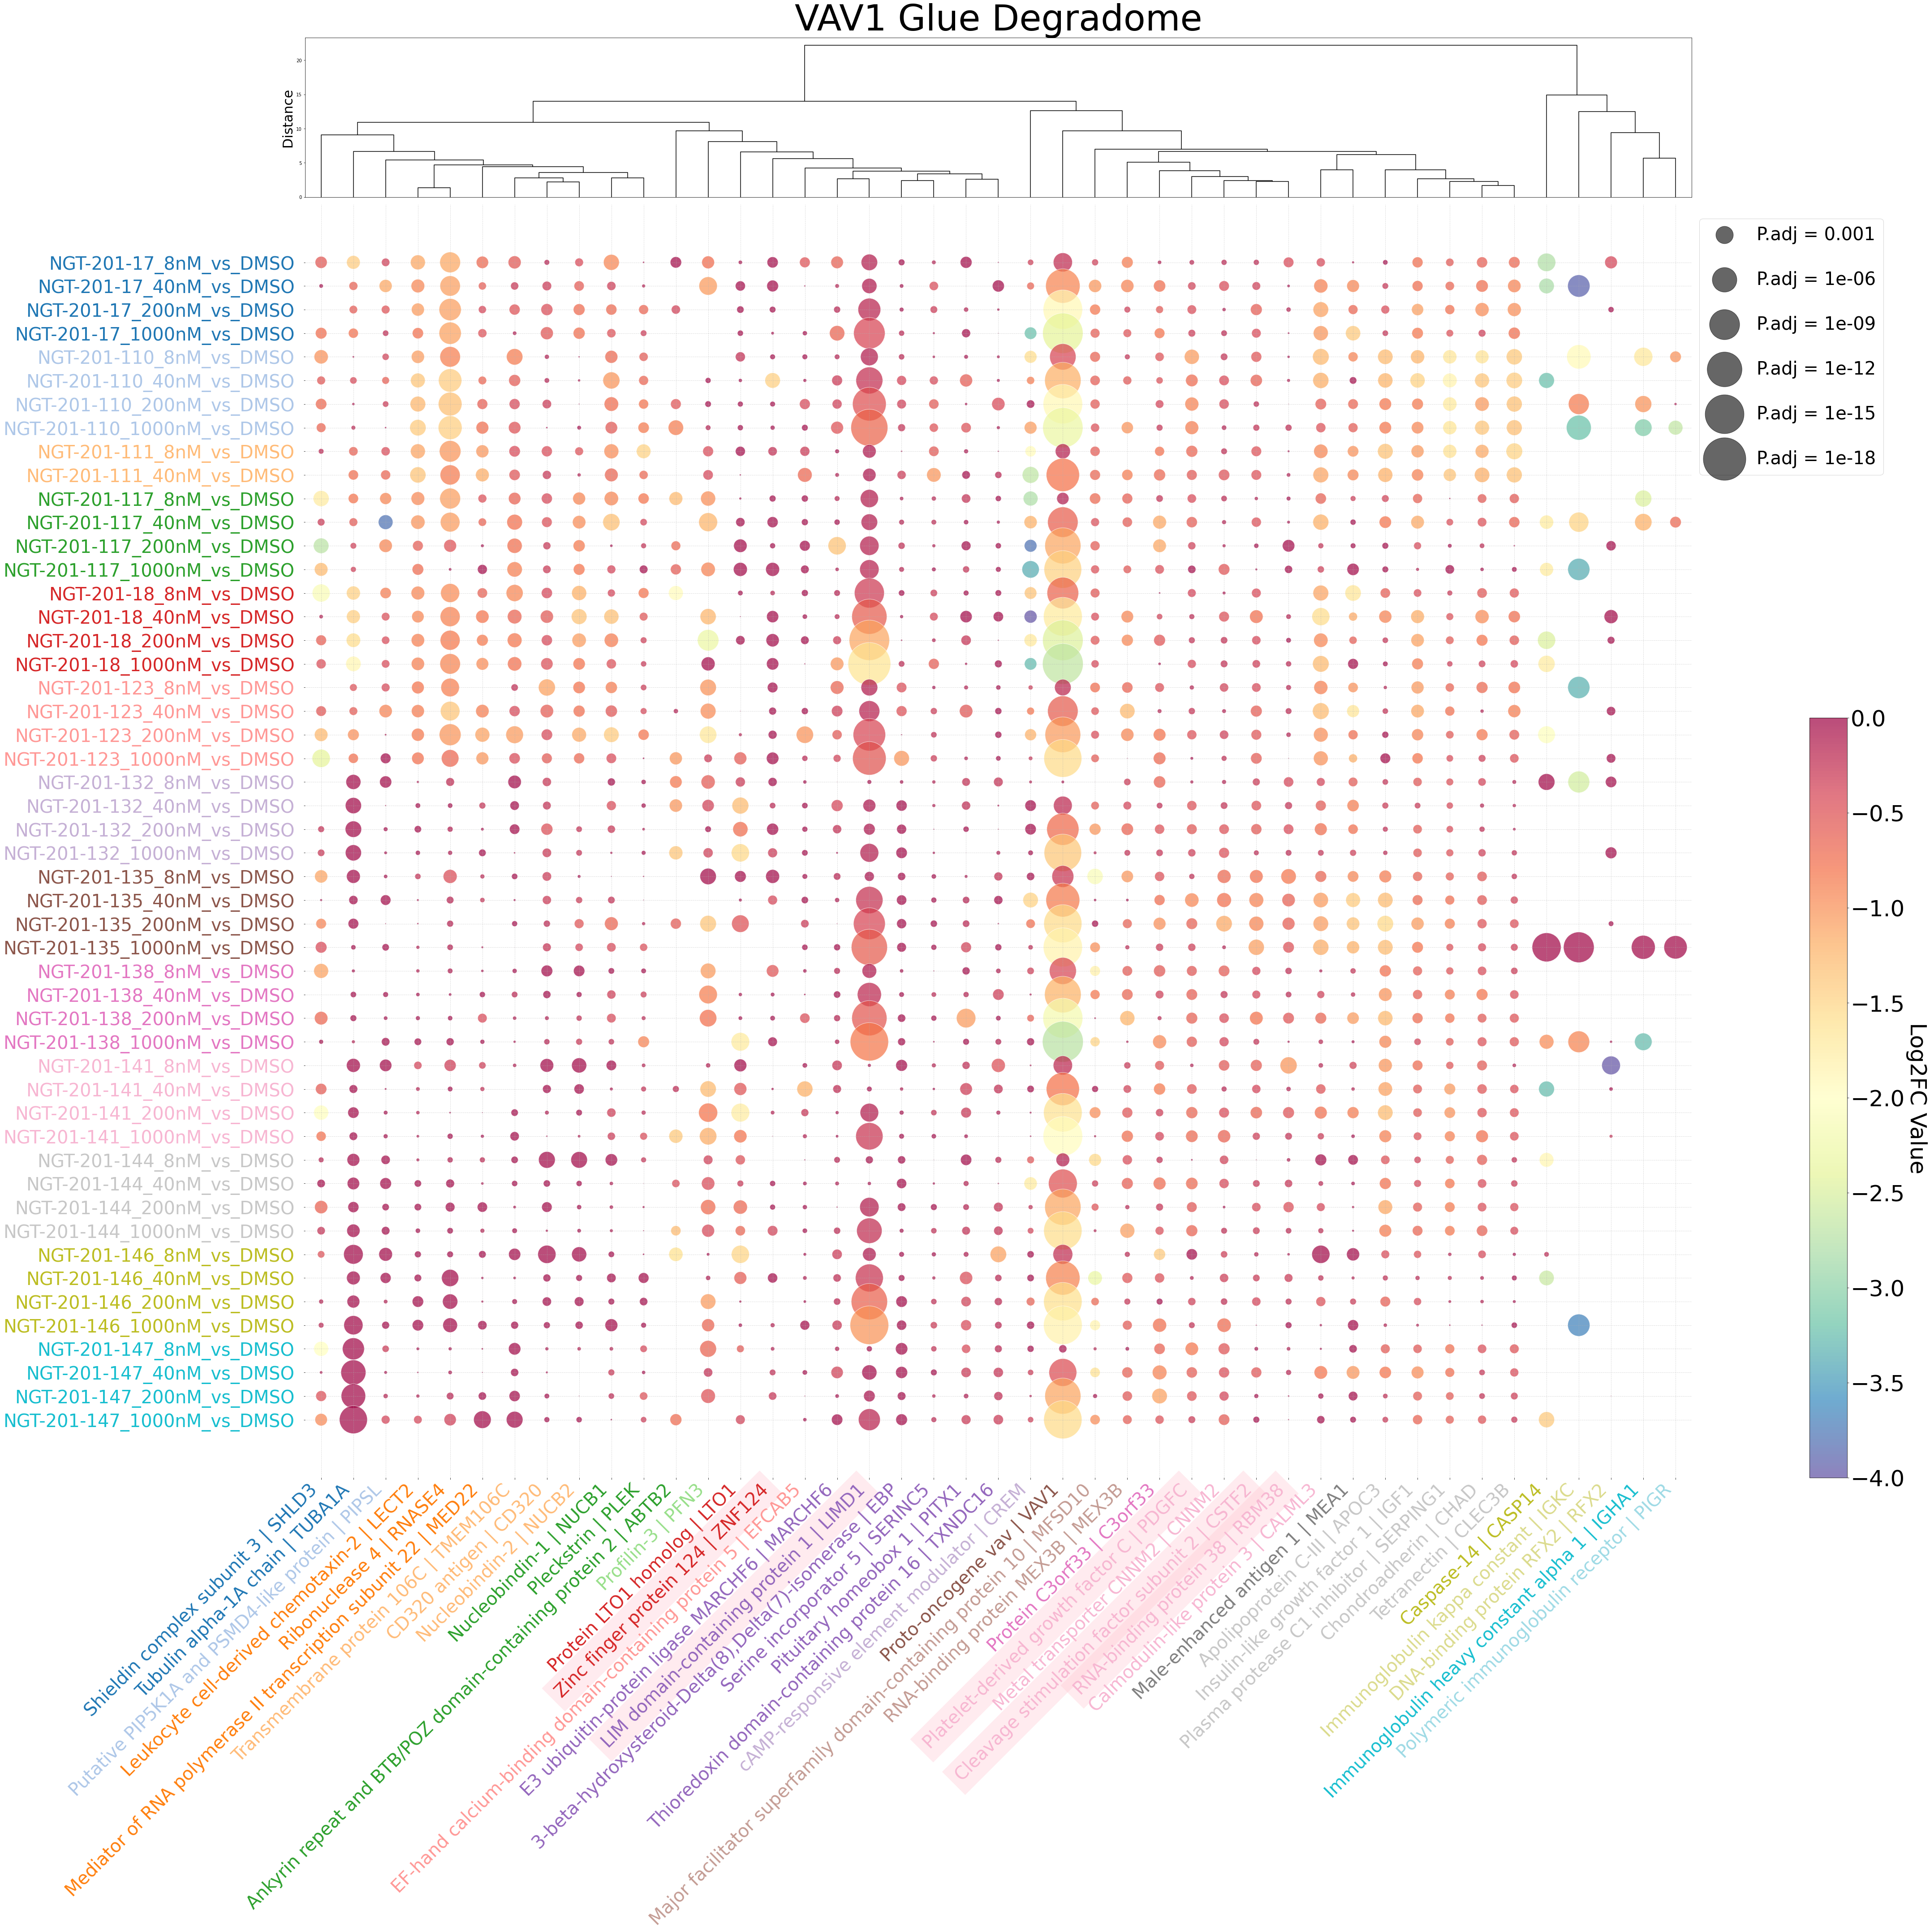

In [14]:
SAR = {
#"11":["NGT20-11_8nM", "NGT20-11_40nM", "NGT20-11_200nM", "NGT20-11_1000nM"],
#"12":["NGT20-12_8nM", "NGT20-12_40nM", "NGT20-12_200nM", "NGT20-12_1000nM"], 
#"13":["NGT20-13_8nM", "NGT20-13_40nM", "NGT20-13_200nM", "NGT20-13_1000nM"],
#"14":["NGT20-14_8nM", "NGT20-14_40nM", "NGT20-14_200nM", "NGT20-14_1000nM"],
"17" :["NGT-201-17_8nM",  "NGT-201-17_40nM",  "NGT-201-17_200nM",  "NGT-201-17_1000nM",],
"110":["NGT-201-110_8nM", "NGT-201-110_40nM", "NGT-201-110_200nM", "NGT-201-110_1000nM",],
"111":["NGT-201-111_8nM", "NGT-201-111_40nM",],
"117":["NGT-201-117_8nM", "NGT-201-117_40nM", "NGT-201-117_200nM", "NGT-201-117_1000nM",],
"18" :["NGT-201-18_8nM",  "NGT-201-18_40nM",  "NGT-201-18_200nM",  "NGT-201-18_1000nM",],
"123":["NGT-201-123_8nM", "NGT-201-123_40nM", "NGT-201-123_200nM", "NGT-201-123_1000nM",],
"132":["NGT-201-132_8nM", "NGT-201-132_40nM", "NGT-201-132_200nM", "NGT-201-132_1000nM",],
"135":["NGT-201-135_8nM", "NGT-201-135_40nM", "NGT-201-135_200nM", "NGT-201-135_1000nM",],
"138":["NGT-201-138_8nM", "NGT-201-138_40nM", "NGT-201-138_200nM", "NGT-201-138_1000nM",],
"141":["NGT-201-141_8nM", "NGT-201-141_40nM", "NGT-201-141_200nM", "NGT-201-141_1000nM",],
"144":["NGT-201-144_8nM", "NGT-201-144_40nM", "NGT-201-144_200nM", "NGT-201-144_1000nM",],
"146":["NGT-201-146_8nM", "NGT-201-146_40nM", "NGT-201-146_200nM", "NGT-201-146_1000nM",],
"147":["NGT-201-147_8nM", "NGT-201-147_40nM", "NGT-201-147_200nM", "NGT-201-147_1000nM",],
}
bubble_dendro_plot(SAR=SAR, SAR_suffix="_vs_DMSO",highlight_G_loop=1, fig_width=60, fig_height=60,dendro_bubble_height_ratio=[1,8], bubble_legend_width_ratio=[10,1],
                   compound_labelsize=40,protein_labelsize=40, rainbow_palette=1,figure_filename="bubble_plot_all_DMSOcombined.png", legend_num=6)